# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Правильно делаешь, что не убираешь описание задачи. Это поможет быстро вспомнить, о чем проект, если ты к нему вернешься спустя какое-то время.

Данный блок можно расширить при помощи плана работы и описания данных. Посмотреть подробнее про вступительный блок можно в разделе "Полезные инструкции в учебе" блока "Оформление проекта".
    
Также советую тебе посмотреть на <a href="https://www.kaggle.com/notebooks/">работы</a>  аналитиков, чтобы оценить, как более опытные коллеги оформляют и проводят исследования.   
</div>

Описание данных:    
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## <font color='#22a9eb'> Откройте файл с данными и изучите общую информацию. </font>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/home/dwpsd/Dev/ds_practicum_projects/datasets/real_estate_data.csv', sep='\t')

###  Общая информация о дата фрейме

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### <font color='#22a9eb'> Гистограммы </font>

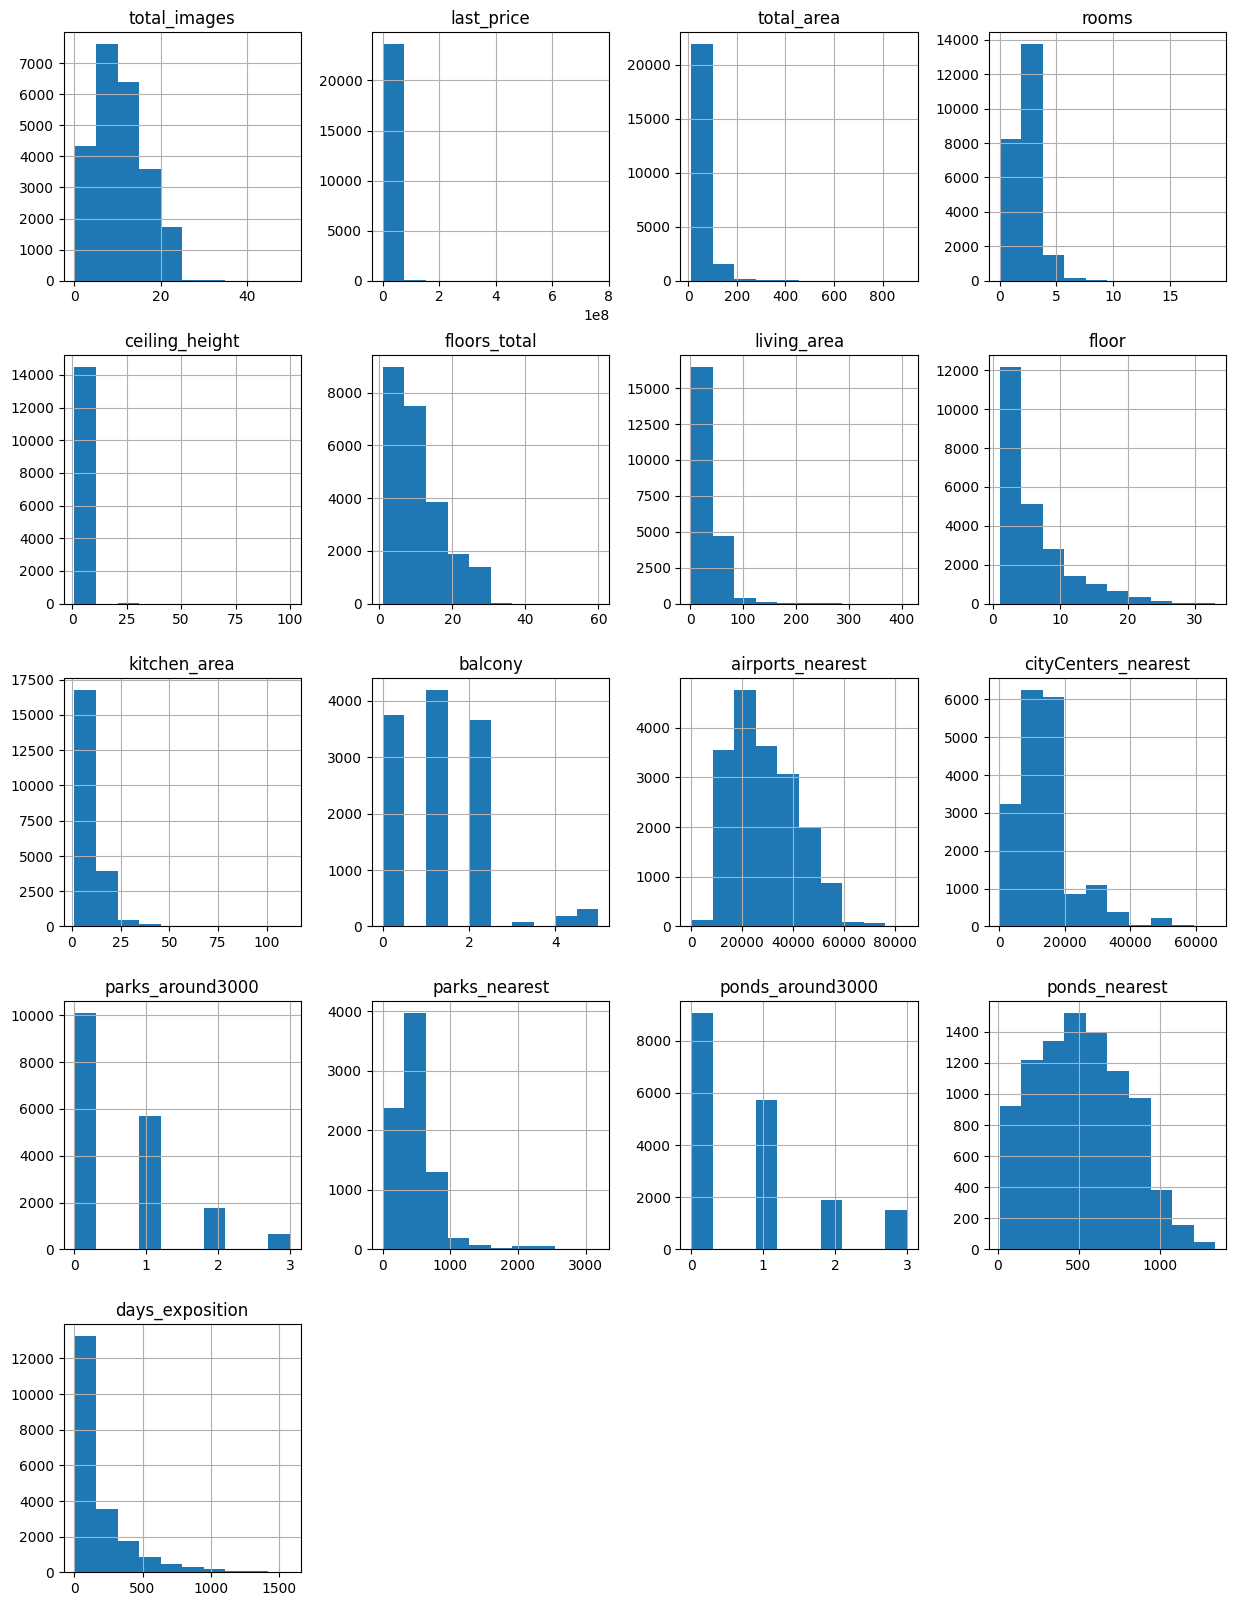

In [5]:
data.hist(figsize=(15, 20));

**Вывод:**    
По общему количеству наличия данных в столбцах, можно предположить, что в массиве порядка 24000 строк в данными. Кроме одной колонки(cityCenters_nearest) все остальные 20 колонок соотвествуют стилю наименования переменных в питоне. Наименование колонки понятное, можно и без описания предположить, что она означает. Для 15 колонок из 21 присутствуют пропуски. Типы данных в колонках разного типа, а значит встречаются строки, целые числа, числа с плавающей точкой, булевы значения. Поскольку строки с пропусками имеют тип данных float64, после проверки возможности их заполнить будет необходимо переводить тип данных ячейки в более явный.

## Предобработка данных

### Определеяем количество пропущенных значений в столбцах

In [6]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Далее рассмотрим каждый столбец на возможность замены пропущенных значений. Для начала определим долю пропущенных значений, рассмотрим имеющиеся значения и возможные варианты замены пропусков.

In [7]:
percentage_none = round((data.isna().sum() / data.isna().count()) * 100, 2)
percentage_none.sort_values(ascending=False)

is_apartment            88.29
parks_nearest           65.91
ponds_nearest           61.56
balcony                 48.61
ceiling_height          38.80
airports_nearest        23.38
cityCenters_nearest     23.29
ponds_around3000        23.28
parks_around3000        23.28
days_exposition         13.42
kitchen_area             9.61
living_area              8.03
floors_total             0.36
locality_name            0.21
total_images             0.00
last_price               0.00
studio                   0.00
floor                    0.00
rooms                    0.00
first_day_exposition     0.00
total_area               0.00
open_plan                0.00
dtype: float64

Или так по совету ревьювера.

In [8]:
pd.DataFrame(round(data.isna().mean()*100,1).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
ponds_around3000,23.300000
parks_around3000,23.300000
cityCenters_nearest,23.300000
days_exposition,13.400000


Доли пропущенных значений позволяют сделать следующие выводы и/или предположения:
- **is_apartment** порядка 88% пропущенных значений, вероятно, если объект недвижимости это аппартаменты, то в данных есть отметка, если не аппартаменты, то значение пропущено;
- **parks_nearest и ponds_nearest** вместе говорит об отсутсвии рядом с объектом недвижимости водоемов в более 60% случаев. В тоже время **ponds_around3000 и parks_around3000**, что в них пропущено только 23% значений, значит отсутствие водоема на расстояние 3 км наблюдается реже. Необходимо проверить показатели попарно и возможно заменить средним значением расстояния там, где это возможно;
- **balcony** количество балконов не указано в 48% случаев. Вероятно, у этого количества объектов недвижимости отсутствуют балконы и можно заменить пропуски на 0;
- **ceiling_height** высота потолков отсутствует у 39% данных. Предположим, что в этом случае используется какое-то среднее значение. При расчетах стоит рассмотреть вариант использования среднего или медианного значения;
- **airports_nearest и cityCenters_nearest** расстояния до аэропорта и сентра города могут быть пропущены из-за нахождения объекта недвижимости в центре города, рядом с которым есть аэропорт, либо пропусками в данных. Стоит оценить город и проверить наличие такого аспекта. Заменить данные средним или медианным значением под вопросом. Скорее всего это не самое лучшее решение;
- **days_exposition** количество дней с момента публикации объявления отсутствуют в 13% случаев. Возможно, это доля новых объявлений.
- **kitchen_area** не указана площадь кухни предполагаем для студий;
- **living_area** не указана жилая площадь не для аппартаментов ли?
- **floors_total и locality_name** всего этажей в доме и названия населенного пункта пропущены менее чем в 1% данных. Возможно имеет смысл такие данные заменить не "неизвестно".

### Заполнение пропусков в данных

#### is_apartment

Проанализируем данные: выведем уникальные значения, оценим количество уникальных значений, чтобы проверить возможность заполнения пропущенных значений булевым типом.

In [9]:
print("Уникальные значения:", data['is_apartment'].unique())
print("Количество значений True:", data[data['is_apartment'] == True]['is_apartment'].count())
print("Количество значений False:", data[data['is_apartment'] == False]['is_apartment'].count())

Уникальные значения: [nan False True]
Количество значений True: 50
Количество значений False: 2725


В столбце явно должны присутствовать булевы значения, поскольку встречается как True, так и False. В какой-то момент что-то пошло не так и данные потерялись, вероятно при объединении данных в одну таблицу(массив). Заменить их на какое-то одно булево значение невозможно, поскольку в этом случае большинство данных будут не верны. Рекомендуется обратиться к тому, кто предоставил файл и попросить проверить корректность данных. После чего провести анализ повторно.

#### parks_nearest и ponds_nearest

Проанализируем какие данные вообще есть, количество уникальных значений, минимальное и максимальное расстояние, среднее и медиану.

In [10]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

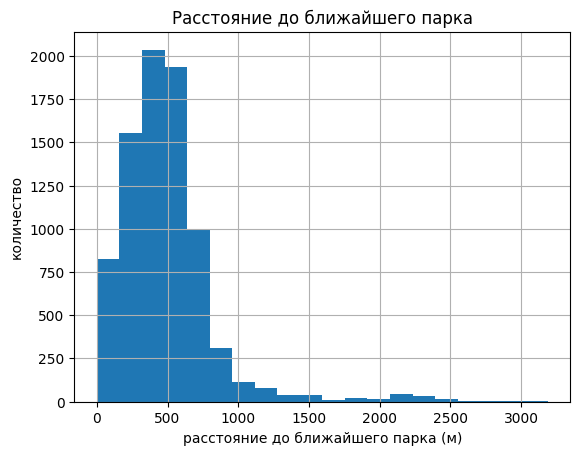

In [11]:
hist_parks_nearest = data['parks_nearest'].hist(bins=20)
hist_parks_nearest.set_title('Расстояние до ближайшего парка')
hist_parks_nearest.set_ylabel('количество')
hist_parks_nearest.set_xlabel('расстояние до ближайшего парка (м)');

Визуально большинство квартир располагаются на расстоянии в 1000м до ближайшего парка. Заполним пропуски медианным значением и оценим как оно повлияло на данные.

In [12]:
#data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
#display(data['parks_nearest'].describe())
#display(data['parks_nearest'].hist(bins=50))
#data['parks_nearest'].isna().sum()

Как и ожидалось это оказывает значительно влияние на данные, а значит заполнять медианным или средним значением пропуски не целесообразно, как и нулевым значением из-за их большого количества. Оно в итоге сильно искажает общие данные при пропусках выше 60%. Само распределение больше напоминает распределение Пуассона, чем нормальное.

Проведем похожее сравнение с `ponds_nearest`.

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

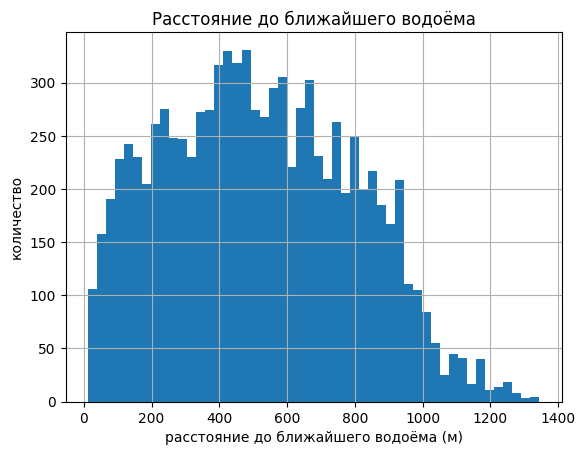

In [13]:
display(data['ponds_nearest'].describe())
hist_ponds_nearest = data['ponds_nearest'].hist(bins=50)
hist_ponds_nearest.set_title('Расстояние до ближайшего водоёма')
hist_ponds_nearest.set_ylabel('количество')
hist_ponds_nearest.set_xlabel('расстояние до ближайшего водоёма (м)');

Для этого столбца распределение больше похоже на нормальное. Попробуем в этом случае заменить данные на медианное значение.

In [14]:
#data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
#display(data['ponds_nearest'].describe())
#display(data['ponds_nearest'].hist(bins=50))
#data['ponds_nearest'].isna().sum()

Для `ponds_nearest` наблюдается такая же проблема из-за большого количества пропущенных значений. Заменить их медианным или средним значениям - внести "шум" данные. Оставляем как есть.

Заполнять пропущенные данные для столбцов `parks_nearest` и `ponds_nearest`при доле пропусков выше 60% не представляется возможным. В этом случае количество данных с пропусками значительное и заменить их на какое-то среднее или медианное значение приводит к сильному искажению данных.

#### balcony

Проанализируем даные по части наличия балконов.

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Уникальные значения столбца balcony: [nan  2.  0.  1.  5.  4.  3.]


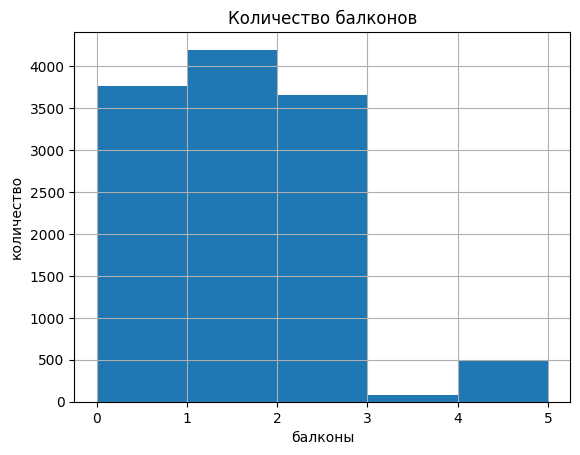

In [15]:
display(data['balcony'].describe())
print("Уникальные значения столбца balcony:", data['balcony'].unique())
hist_balcony = data['balcony'].hist(bins=5)
hist_balcony.set_title('Количество балконов')
hist_balcony.set_ylabel('количество')
hist_balcony.set_xlabel('балконы');

Среди значений количества балконов встерчаются нули. Предположительно там где `nan` могли использоваться в каких-то данных нули. Проверим общее количество значений и попробуем заменить `nan` на нули.

In [16]:
data['balcony'].value_counts()

balcony
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

Количество значений столбца с nan 0


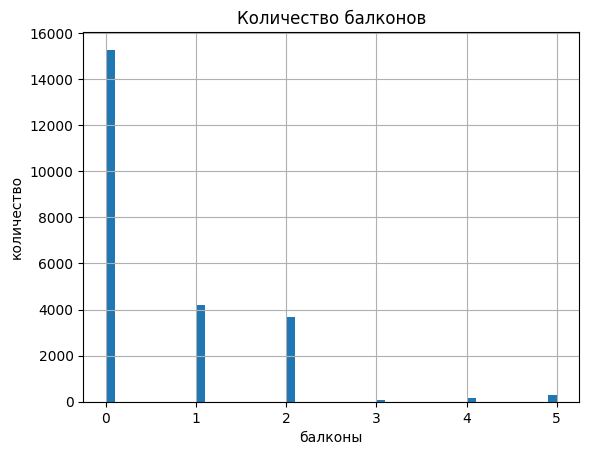

In [17]:
data['balcony'] = data['balcony'].fillna(0.0)
display(data['balcony'].describe())
hist_fill_balcony = data['balcony'].hist(bins=50)
hist_fill_balcony.set_title('Количество балконов')
hist_fill_balcony.set_ylabel('количество')
hist_fill_balcony.set_xlabel('балконы')
print("Количество значений столбца с nan", data['balcony'].isna().sum())
hist_fill_balcony;

И в этом случае при доле пропущенных значений в 48% данные исказились. Изменилась медиана, сильно изменилось среднее значение, но при этом стандартное отклонение значительно не изменилось в отличие от предыдущих случаев. Исходя из логики исходных данных, заменяем неизвестные значения нулем. Посмотрим на общую информацию о таблице. Столбец `balcony` в формате чисел с плавающей точкой. При этом балконы это целочисленное значение. Переведем столбец в более очевидный тип. Могут ли быть 1,5 балкона? Может быть, но не в мою смену.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [19]:
data['balcony'] = data['balcony'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Для данного столбца пустые значения заменены на ноль, тип столбца приведен к целочисленному типу. 

#### ceiling_height

А как обстоят дела с высотой потолков?

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Уникальные значения столбца balcony: [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   

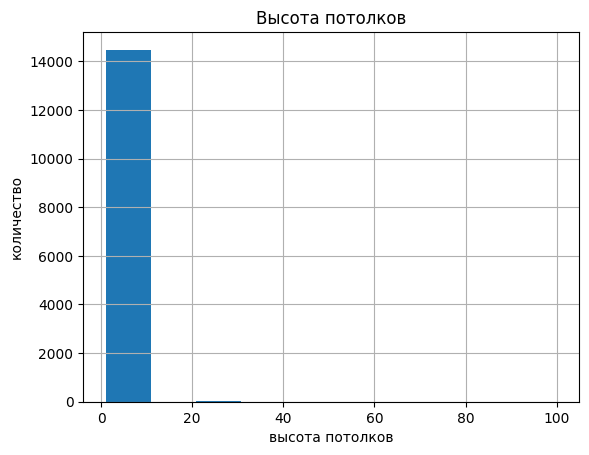

In [20]:
display(data['ceiling_height'].describe())
print("Уникальные значения столбца balcony:", data['ceiling_height'].unique())
hist_ceiling_height = data['ceiling_height'].hist(bins=10)
hist_ceiling_height.set_title('Высота потолков')
hist_ceiling_height.set_ylabel('количество')
hist_ceiling_height.set_xlabel('высота потолков');

Гистограмма в данном случае не особо показательна, а вот список уникальных значений действительно уникален. Помимо пропущенных значений, в списке множество выбивающихся из общего числа. Например `100`, `22.6`, `1`. Стоит оценить количество таких данных, поскольку в среднем высота потолка от 2,5 метров, то значения ниже очень сомнительны. Значения типа `22.6` возможно записали не верно, подразумевая `2.26`.

In [21]:
data[data['ceiling_height'] > 10].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,...,12.0,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,...,13.0,1,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,...,NaN,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0
11285,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,...,9.0,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
14382,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,...,8.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0


По этим данным можем судить, что двузначные числа это не ошибка, а аппартаменты и квартиры. Так же данная таблица позволдяет сделать вывод, что столбец `is_apartment` содержит случайный набор данных, потому что никаких зависимости между тем, является ли недвижимость аппартаментом или нет - не прослеживается.

Из всех данных значительно выделяется квартиры на 5-ом этаже 5-ти этажного дома с высотой в 100 м. Можно предположить, что это президенский люкс, что вряд ли, поэтому скорее всего имелось ввиду значение 10м.

Построим такую же таблицу для выссоты потолка менее 2,0 м(допустим, что это какие-то особенные помещения).

In [22]:
data[data['ceiling_height'] < 2.0].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


Совсем выбиваются из всех высот это три квартиры с высотами потолков для собачей будки или домика для садовых гномов, поскольку ни собаки, ни садовые гномы пока не научились пользоваться интереностом и не имеют прав заниматься продажей недвижимости, то причисляем эти значения к ошибкам. Попробуем заменить пропуски и выбивающиеся значения средним или медианой и сравнить эти значения.

In [23]:
# медиана
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.loc[data['ceiling_height'] < 2.0, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 100.0, 'ceiling_height'] = 10.0
display(data['ceiling_height'].describe())

count    23699.000000
mean         2.720730
std          0.761179
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

In [24]:
# среднее
#data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
#data[data['ceiling_height'] < 2.0] = data['ceiling_height'].mean()
#data[data['ceiling_height'] == 100.0] = 10.0
#display(data['ceiling_height'].describe())

Стандартное отклониние изменилось незначительно, квартали остались примерно на том же уровне, при этом мы избавились от излишне больших и малых значений, а так же заполнили пропуски медианным значением. При сравнении среднего и медианного значения в данном примере разница небольшая, однако по известным причинам использование медианы предпочтительнее.

#### <font color='#22a9eb'> airports_nearest </font>

Далее доля пропусков уже всего 23%. Посмотрим, что скрывается в кроличьей норе.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Уникальные значения столбца airports_nearest: [18863. 12817. 21741. ... 11751. 20151. 24665.]


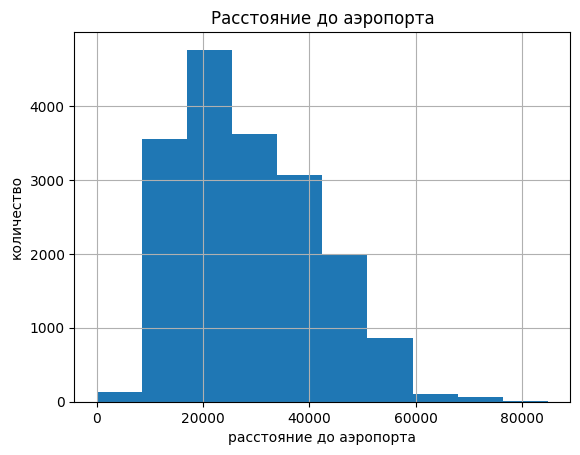

In [25]:
display(data['airports_nearest'].describe())
print("Уникальные значения столбца airports_nearest:", data['airports_nearest'].unique())
hist_airports_nearest = data['airports_nearest'].hist(bins=10)
hist_airports_nearest.set_title('Расстояние до аэропорта')
hist_airports_nearest.set_ylabel('количество')
hist_airports_nearest.set_xlabel('расстояние до аэропорта');

Предварительный анализ позволяет судить, что данные распределены более-менее равномерно, помимо странного значения равное нулю. Квартиры в аэропорту - может быть, но вряд ли. Заменим это странное значение на медианное и заполним пропуски так же медианным значением.

In [26]:
data[data['airports_nearest'] < 5000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [27]:
#data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
#data.loc[data['airports_nearest'] < 5000, 'airports_nearest'] = data['airports_nearest'].median()
#display(data['airports_nearest'].describe())

~~При небольшой доле пропусков было уместно исключить слишком близкие значения расстояний от квартир до аэропорта и заполнить пустые значения медианным. Стандартное отклонение изменилось незначительно.~~
 
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Не заполняем картографические данные чем-либо, чтобы не искажать выборку.
</div>

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Заполнять мы, строго говоря, имеем право только когда данные пропущены совершенно случайно (MCAR) - тогда заполнение не повлияет на характер связи между заполняемой переменной и остальными. Относятся ли пропуски в данном столбце к данному типу пропусков? Обработка пропусков медианой в данном случае невозможна.
    
Картографию я бы не трогал, тк вероятно расстояние автоматически не подсчиталось до объектов, или может там нет парков прудов и прочего. Как вариант конечно можно было провести группировку по населенному пункту с измерением среднего показателя, далее заполнить соответствующим значением, но не думаю, что мы бы много записей спасли.
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Исправил, спасибо! 
</div>

#### cityCenters_nearest (city_centers_nearest)

Для начала переименуем столбцы на питоновский стиль. Проанализируем по аналогии с расстоянием до аэропорта и заменим пустые значения.

In [28]:
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    })
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Уникальные значения столбца city_centers_nearest: [16028. 18603. 13933. ... 27977.  7262.  6263.]


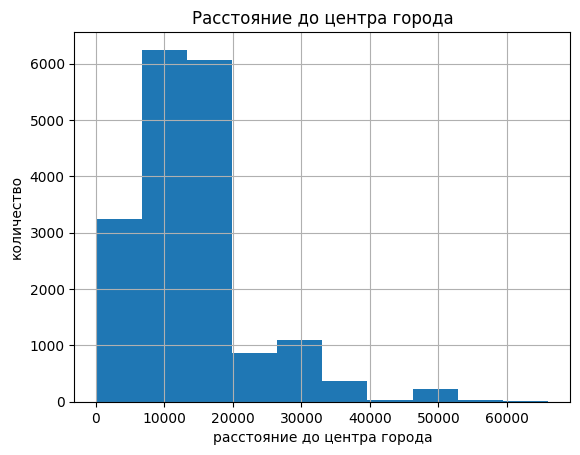

In [29]:
display(data['city_centers_nearest'].describe())
print("Уникальные значения столбца city_centers_nearest:", data['city_centers_nearest'].unique())
hist_city_centers_nearest = data['city_centers_nearest'].hist(bins=10)
hist_city_centers_nearest.set_title('Расстояние до центра города')
hist_city_centers_nearest.set_ylabel('количество')
hist_city_centers_nearest.set_xlabel('расстояние до центра города');

В данном случае заполним пустые значения медианным - 181 метр до центра города, а почем бы и нет?

In [30]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())
display(data['city_centers_nearest'].describe())

count    23699.000000
mean     13936.792797
std       7553.779633
min        181.000000
25%      10927.000000
50%      13098.500000
75%      15248.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Аномальных значений в данном столбце нет. пустые значения заполнены медианным значением.

#### ponds_around3000 и parks_around3000 (ponds_around_3000 и parks_around_3000)

Переименование столбцов было осуществлено в разделе 2.2.6 вместе с центром города, чтобы не разбивать одну и ту же операцию в трех местах. 

Проведем похожий анализ, как в предыдущих разделах.

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

Уникальные значения столбца ponds_around_3000: [ 2.  0.  3.  1. nan]


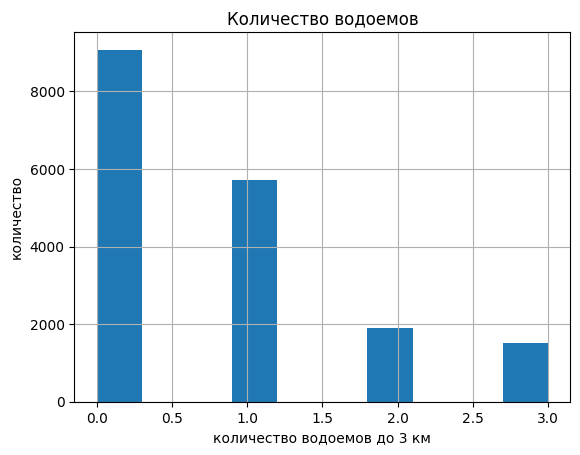

In [31]:
display(data['ponds_around_3000'].describe())
print("Уникальные значения столбца ponds_around_3000:", data['ponds_around_3000'].unique())
hist_ponds_around_3000 = data['ponds_around_3000'].hist(bins=10)
hist_ponds_around_3000.set_title('Количество водоемов')
hist_ponds_around_3000.set_ylabel('количество')
hist_ponds_around_3000.set_xlabel('количество водоемов до 3 км');

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Уникальные значения столбца parks_around_3000: [ 1.  0.  2. nan  3.]


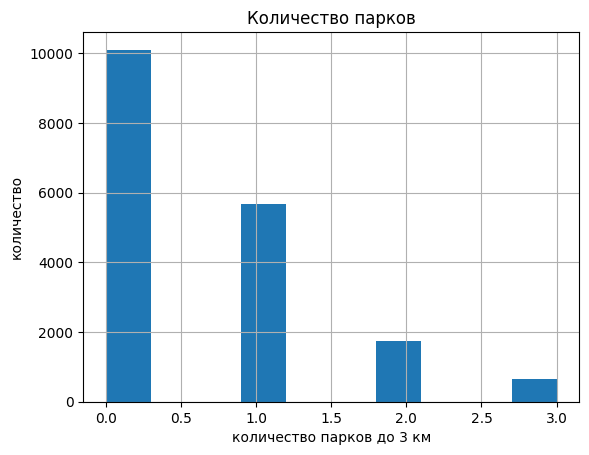

In [32]:
display(data['parks_around_3000'].describe())
print("Уникальные значения столбца parks_around_3000:", data['parks_around_3000'].unique())
hist_parks_around_3000 = data['parks_around_3000'].hist(bins=10)
hist_parks_around_3000.set_title('Количество парков')
hist_parks_around_3000.set_ylabel('количество')
hist_parks_around_3000.set_xlabel('количество парков до 3 км');

По своему набору данные очень похожи на обработку балконов. Пропущенные значения интерпретируем как нули и заполним таблицу.

In [33]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

display(data['ponds_around_3000'].describe())
display(data['parks_around_3000'].describe())

count    23699.000000
mean         0.590911
std          0.883999
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

count    23699.000000
mean         0.469049
std          0.748534
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Пропуски заполнены нулевыми значениями, поскольку в данных встречаются числа от 0 до 3, то логично предположить, что пропуски это нулевые значения.

#### days_exposition

Рассмотрим данные в этом столбце.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Уникальные значения столбца days_exposition: [  nan   81.  558. ... 1360. 1007.  971.]


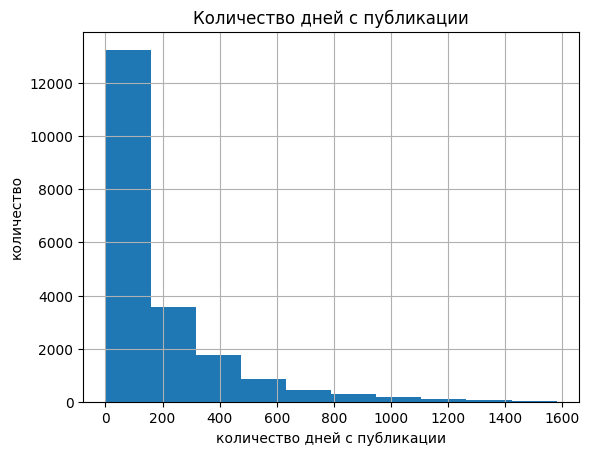

In [34]:
display(data['days_exposition'].describe())
print("Уникальные значения столбца days_exposition:", data['days_exposition'].unique())
hist_days_exposition = data['days_exposition'].hist(bins=10)
hist_days_exposition.set_title('Количество дней с публикации')
hist_days_exposition.set_ylabel('количество')
hist_days_exposition.set_xlabel('количество дней с публикации');

Минимальное количество дней, которое висело объявление о продаже составило 1 день, максимальное 1580 дней. В целом логично.

Смысла заполнять пустые значения нет. Если объявление не снято, значит оно еще актуально. Заполнять какими-либо средними данными нет смысла.

#### kitchen_area

Переходим к самому вкусному - к кухне. Проанализируем какие данные есть в столбце, и посмотрим сможем ли заполнить пропуски. Доля пропусков менее 10% и это уже радует.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Уникальные значения столбца kitchen_area: 972


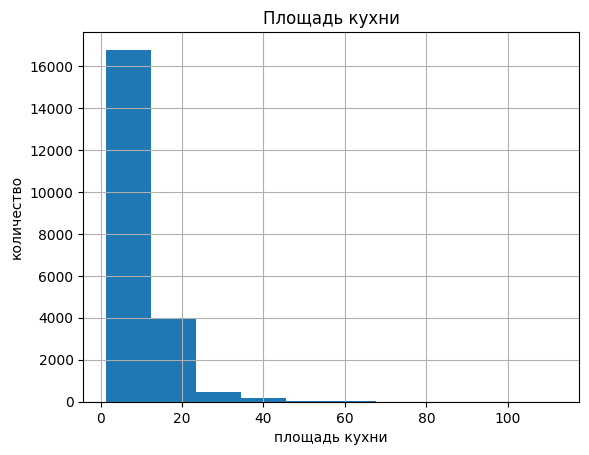

In [35]:
display(data['kitchen_area'].describe())
print("Уникальные значения столбца kitchen_area:", len(data['kitchen_area'].unique()))
hist_kitchen_area = data['kitchen_area'].hist(bins=10)
hist_kitchen_area.set_title('Площадь кухни')
hist_kitchen_area.set_ylabel('количество')
hist_kitchen_area.set_xlabel('площадь кухни');

Разброс значений площадей кухонь огромный. Выбивающихся минимальных или максимальных значений нет. Да, метр тридцать это как душевая, но что только сейчас не строят.

~~Заменим пустые значения медианным. В цеkом на данных это сильно не скажется из-за небольшого разроса по минимальному и максимальному значению.~~ При дальнейшей проверке такого варинта оказалось, что сумма жилой площади и кухни превышает общую. Оставляем пропуски.

In [36]:
#data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

display(data['kitchen_area'].describe())

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Кухня под 100 квадратных метров это как маленький ресторан, но продолим обработку данных. Сравним значение медианного кухни с общей площадью и жилой площадью.

In [37]:
data[data['total_area'] < data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [38]:
data[data['living_area'] < data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
51,7,45000000.0,161.00,2017-10-17T00:00:00,3,3.20,8.0,38.00,4,NaN,...,50.00,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
53,7,4300000.0,39.10,2017-11-10T00:00:00,1,2.65,25.0,15.40,13,NaN,...,15.50,2,посёлок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0
101,4,3000000.0,37.00,2019-03-23T00:00:00,1,2.75,10.0,12.00,3,NaN,...,13.00,0,садовое товарищество Новая Ропша,NaN,13098.5,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23388,7,5400000.0,43.00,2017-04-24T00:00:00,1,2.65,18.0,12.00,8,NaN,...,20.00,0,Санкт-Петербург,25108.0,15940.0,0.0,NaN,0.0,NaN,124.0
23481,1,3000000.0,37.29,2019-04-15T00:00:00,1,2.65,19.0,10.08,10,NaN,...,16.88,0,Санкт-Петербург,37006.0,15157.0,0.0,NaN,0.0,NaN,7.0
23573,8,6290000.0,47.67,2019-03-20T00:00:00,1,3.60,12.0,13.59,12,NaN,...,17.87,2,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0
23574,14,64990000.0,139.00,2015-11-24T00:00:00,3,3.00,8.0,3.00,8,NaN,...,16.00,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Среди данных появились случаи, когда площадь кухни больше жилой площади, что допускается, но требуется проверка не превысили ли эти значения общую площадь.

In [39]:
data[data['total_area'] < (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,NaN,...,5.00,0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2,посёлок Мурино,NaN,13098.5,0.0,NaN,0.0,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2,городской поселок Большая Ижора,NaN,13098.5,0.0,NaN,0.0,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2,Сосновый Бор,NaN,13098.5,0.0,NaN,0.0,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.65,16.0,62.00,12,NaN,...,32.40,0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.65,5.0,44.00,5,NaN,...,8.00,1,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


Получилось 307 строк где сумма жилой площади и кухни стала больше общей площади. Отмена операции заполнения пропусков медианным значением.

#### living_area

Рассмотрим жилую площадь.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Уникальные значения столбца living_area: 1783


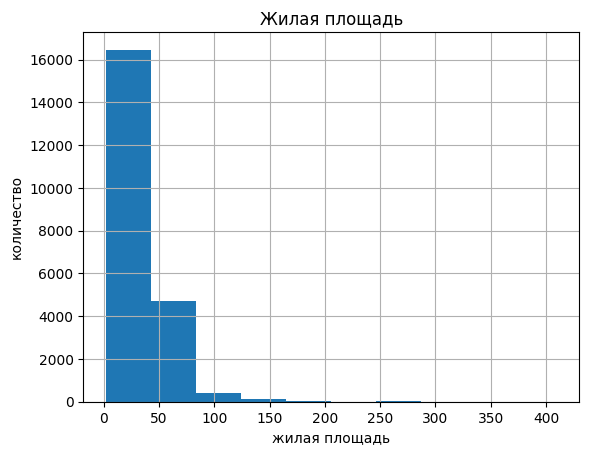

In [40]:
display(data['living_area'].describe())
print("Уникальные значения столбца living_area:", len(data['living_area'].unique()))
hist_living_area = data['living_area'].hist(bins=10)
hist_living_area.set_title('Жилая площадь')
hist_living_area.set_ylabel('количество')
hist_living_area.set_xlabel('жилая площадь');

Жилая площадь на двух квадратах это странно, но может быть,а 400 квадратов как целый этаж. ~~Заполним пропущенные значения медианным и проверим как много небольших жилых площадей.~~ При проверке анамолий это оказалось плохой идеей, поскольку появились квартиры с жилой площадью больше общей. Оставляем пропуски.

In [41]:
display(data[data['living_area'] < 6])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.65,17.0,3.0,17,NaN,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,2.65,25.0,5.0,8,NaN,...,NaN,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.65,24.0,2.0,22,NaN,...,NaN,0,посёлок Мурино,NaN,13098.5,0.0,NaN,0.0,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.50,9.0,5.4,1,NaN,...,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8.0,3.0,8,NaN,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Нулевых значений живой площади нет, небольшие значения не часто, но встречаются. ~~Оставим их и заполним пропуски.~~

In [42]:
#data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

#### <font color='#22a9eb'> floors_total </font>

Проверим информацию относительно количества этажей в доме и посмотрим нет ли выбивающихся значений.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Уникальные значения столбца floors_total: [16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


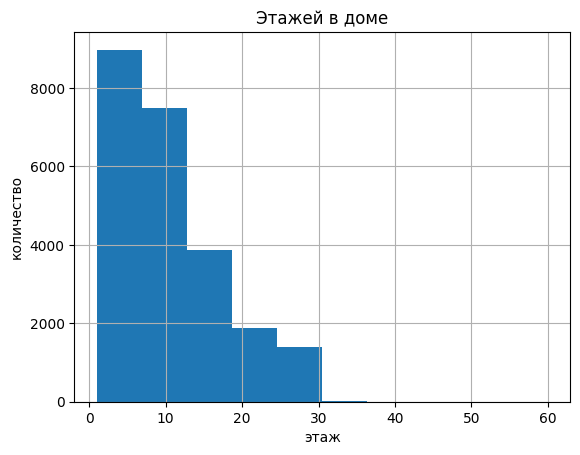

In [43]:
display(data['floors_total'].describe())
print("Уникальные значения столбца floors_total:", data['floors_total'].unique())
hist_floors_total = data['floors_total'].hist(bins=10)
hist_floors_total.set_title('Этажей в доме')
hist_floors_total.set_ylabel('количество')
hist_floors_total.set_xlabel('этаж');

Не реально огромных значений не обнаружено. Минимальное значение 1 этаж. Проверим остальную информацию для пропусков и посмотрим, есть ли смысл заменять пропущенные значения на 1 этаж.

In [44]:
data[data['floors_total'].isna()].head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,NaN,...,NaN,0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,NaN,...,9.00,0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,NaN,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,NaN,...,12.30,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,NaN,...,12.00,0,Кудрово,NaN,13098.5,0.0,NaN,0.0,NaN,231.0


Разброс значений по этажам, на которых находится квартира, довольно большой, а значит заменить пропущенные значения на 1 этаж не получится, как и заменить на номер этажа квартиры, поскольку это может дополнительно испортить данные.

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Доля пропусков здесь менее 5% и для экономии времени их можно удалить.
</div>

In [45]:
dup_floors_total_before_del = data['floors_total'].isna().sum()
data = data.dropna(subset=['floors_total'])
print(f'Удалено {dup_floors_total_before_del} пропусков.')

Удалено 86 пропусков.


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
Пропуски удалены.
</div>

#### <font color='#22a9eb'> locality_name </font>

Для названий населенного пункта что-то количественно анализировать особо смысла нет, есть пропущенные значения, заменим их на "Неизвестно". Имеет смысл проверить повторяющиеся значения и похожие значения, значения пунктов в разных регистрах.

In [46]:
# data['locality_name'] = data['locality_name'].fillna('Неизвестно')
dup_floors_locality_name_del = data['locality_name'].isna().sum()
data = data.dropna(subset=['locality_name'])
display(data['floors_total'].describe())
print(f'Удалено {dup_floors_locality_name_del} пропусков.')

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Удалено 48 пропусков.


<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Аналогично
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
Заполнение "неизвестно" исправлено на удаление пропусков.
</div>

Из результата проверки на явные дубликаты видно, что их огромное количество - конечно, это же название населенного пункта, есть смысл проверять только неявные дубликаты. Например буквы `е` и `ё`.

In [47]:
display(data['locality_name'].value_counts())
data['locality_name'].str.lower().value_counts()

locality_name
Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

locality_name
санкт-петербург                    15651
посёлок мурино                       520
посёлок шушары                       439
всеволожск                           398
пушкин                               369
                                   ...  
поселок каложицы                       1
посёлок платформа 69-й километр        1
поселок почап                          1
поселок гончарово                      1
посёлок дзержинского                   1
Name: count, Length: 364, dtype: int64

При приведении названий населенных пунктов к нижнему регистру, количество уникальных населенных пунктов не изменилось - осталось 365. Получается, что дубликатов по регистру нет.

In [48]:
display(
    data['locality_name']
    .str.lower() 
    .str.replace('ё', 'е', regex=True)
    .value_counts()
)
(
    data['locality_name']
    .str.replace('ё', 'е', regex=True)
    .value_counts()
)

locality_name
санкт-петербург                     15651
поселок мурино                        552
поселок шушары                        439
всеволожск                            398
пушкин                                369
                                    ...  
поселок левашово                        1
садовое товарищество новая ропша        1
деревня шпаньково                       1
деревня курковицы                       1
поселок дзержинского                    1
Name: count, Length: 330, dtype: int64

locality_name
Санкт-Петербург                     15651
поселок Мурино                        552
поселок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: count, Length: 330, dtype: int64

Замена `е` и `ё` уменьшила количество неявных дубликатов. Приведение к нижнему регистру не изменило результат(населенные пункты с "Ё" не начинаются).

In [49]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                     15651
поселок Мурино                        552
поселок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: count, Length: 330, dtype: int64

In [50]:
display(
    data['locality_name']
    .str.replace('-', ' ', regex=True)
    .value_counts()
)
display(
    data['locality_name']
    .str.replace('  ', ' ', regex=True)
    .value_counts()
)

locality_name
Санкт Петербург                     15651
поселок Мурино                        552
поселок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: count, Length: 330, dtype: int64

locality_name
Санкт-Петербург                     15651
поселок Мурино                        552
поселок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: count, Length: 330, dtype: int64

Двух пробелов в названиях пунктов нет, как и дефис не влияет на выборку. Поиск неявных дубликатов закончен.

In [51]:
data[data['locality_name'].str.len() < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Населенных пунктов со странными сокращениями или не довнесенными до конца нет. В данной выгрузке названия всех населенных пунктов как минимум состоят из 3 символов.

Можно так же проверить вхождения населенных пунктов в названия других населенных пунктов, типа `Шум` в `поселок Шум`, но подобное сранение может внести "шум" в данные, названия могут повторяться, но иметь разное расположение(просто `Шум` это относится к какой-нибудь деревне, а `поселок Шум` это поселок и если мы их по незнанию объединим, то спасибо никто не скажет). Если бы это был не учебный, а реальный проект, то еще был бы смысл проверить в наименовании только цифры(`111111`), проверить разнообразие букв, исключая варианты с повторами `ааа`, `ссс`, наличия спец.символов и т.п. посредством реализации отдельных валидаторов. Поскольку в данном учебном проекте условия более "тепличные", вроде бы текущих проверок достаточно.

На текущий момент все возможные операции с наименованием населенного пункта произведены.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Отлично! Можно еще применить такой подход:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
</div>

### <font color='#22a9eb'> Проверка и корректировка типов данных </font>

Некоторые столбцы уже были переведены в более ожидаемый тип. Проверим, какие еще столбцы можно привести к более ожиаемому типу.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

In [53]:
for column in data.columns:
    display(column)
    display(data[column].head(10))

'total_images'

0    20
1     7
2    10
3     0
4     2
5    10
6     6
7     5
8    20
9    18
Name: total_images, dtype: int64

'last_price'

0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
5     2890000.0
6     3700000.0
7     7915000.0
8     2900000.0
9     5400000.0
Name: last_price, dtype: float64

'total_area'

0    108.00
1     40.40
2     56.00
3    159.00
4    100.00
5     30.40
6     37.30
7     71.60
8     33.16
9     61.00
Name: total_area, dtype: float64

'first_day_exposition'

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

'rooms'

0    3
1    1
2    2
3    3
4    2
5    1
6    1
7    2
8    1
9    3
Name: rooms, dtype: int64

'ceiling_height'

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
5    2.65
6    2.65
7    2.65
8    2.65
9    2.50
Name: ceiling_height, dtype: float64

'floors_total'

0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
5    12.0
6    26.0
7    24.0
8    27.0
9     9.0
Name: floors_total, dtype: float64

'living_area'

0    51.00
1    18.60
2    34.30
3      NaN
4    32.00
5    14.40
6    10.60
7      NaN
8    15.43
9    43.60
Name: living_area, dtype: float64

'floor'

0     8
1     1
2     4
3     9
4    13
5     5
6     6
7    22
8    26
9     7
Name: floor, dtype: int64

'is_apartment'

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: is_apartment, dtype: object

'studio'

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: studio, dtype: bool

'open_plan'

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: open_plan, dtype: bool

'kitchen_area'

0    25.00
1    11.00
2     8.30
3      NaN
4    41.00
5     9.10
6    14.40
7    18.90
8     8.81
9     6.50
Name: kitchen_area, dtype: float64

'balcony'

0    0
1    2
2    0
3    0
4    0
5    0
6    1
7    2
8    0
9    2
Name: balcony, dtype: int64

'locality_name'

0              Санкт-Петербург
1               поселок Шушары
2              Санкт-Петербург
3              Санкт-Петербург
4              Санкт-Петербург
5    городской поселок Янино-1
6            поселок Парголово
7              Санкт-Петербург
8               поселок Мурино
9              Санкт-Петербург
Name: locality_name, dtype: object

'airports_nearest'

0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
5        NaN
6    52996.0
7    23982.0
8        NaN
9    50898.0
Name: airports_nearest, dtype: float64

'city_centers_nearest'

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
5    13098.5
6    19143.0
7    11634.0
8    13098.5
9    15008.0
Name: city_centers_nearest, dtype: float64

'parks_around_3000'

0    1.0
1    0.0
2    1.0
3    2.0
4    2.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: parks_around_3000, dtype: float64

'parks_nearest'

0    482.0
1      NaN
2     90.0
3     84.0
4    112.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
Name: parks_nearest, dtype: float64

'ponds_around_3000'

0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: ponds_around_3000, dtype: float64

'ponds_nearest'

0    755.0
1      NaN
2    574.0
3    234.0
4     48.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
Name: ponds_nearest, dtype: float64

'days_exposition'

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
7      NaN
8    189.0
9    289.0
Name: days_exposition, dtype: float64

In [54]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#data['airports_nearest'] = data['airports_nearest'].astype(int)
data['city_centers_nearest'] = data['city_centers_nearest'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony              

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 При чтении файла можно указать параметр `parse_dates: parse_dates=['date']`. Тогда пандас автоматически переведет список столбцов в даты. Пример можно посмотреть [здесь](https://newtechaudit.ru/gruzi-daty-krasivo/).
</div>

Где это было возможно, типы столбцов переведены в более логичный для себя тип.
- last_price, переведен в int поскольку в подобных случаях цена квартиры не учитывается до копеек;
- first_day_exposition, переведен в формат даты из строки, потому что даты публикации;
- airports_nearest и city_centers_nearest, переведены в int, поскольку учитывается растояние в матрах до ближайщего объекта, а 18 км и половинка метра не несет смысла;
- parks_around_3000 и ponds_around_3000, переведены так же в int, поскольку обозначают количество объектов поблизости. 2,5 озера очень сомнительно.
- balcony, ранее был так же переведен в int, поскольку это количество балконов, а 1,5 балкона - это 1 балкон и лоджия.
- <font color='#22a9eb'> floors_total, переден в формат int, никаких половинок этажей. </font>

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Замечания:
    
* Отсутствует проверка явных дубликатов, а это основа предобработки данных.
    
* Обрати, пожалуйста, внимание на тип данных в floors_total. Ты верно подметил, что 1.5 балкона быть не может, но и 2.5 этажа тоже :)
</div>

In [55]:
data['floors_total'] = data['floors_total'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony              

Проверим количество явных дубликатов.

In [56]:
data.duplicated().sum()

0

Явных дубликатов нет(мне показалось это старнным, поэтому я отдельно в самом начале проверил - их изначально не было).

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
 
* Мне это тоже показалось странным. После проведенной предобработки, я обратил внимание, что мы не исключаем явные дубликаты, несмотря на то, что работаем с не явными. Допустил, что дубликаты в этом случае необходимо учитывать, но если уже два человека считают это не верным, то добавил удаление явных дубликатов.
    
* Абсолютно врено подмечено, из-за того, что там были пропущенные значения перевести столбец 'floors_total' в "int" было невозможно, ведь пандас считает "nan" как вещественные числа. Так как ты предложил удалить пропуски, то это проблема не актуальна и я дополнил перевод этого столбца в "int".
</div>

### Проверка аномалий в оставшихся столбцах

При заполнении пропусков во многих столбцах аномалии уже были отсеяны и заполнены по возможности. Проверим оставшиеся столбцы на их наличие.

total_images             
last_price               
studio                   
floor                    
rooms                    
first_day_exposition     
total_area               
open_plan                

In [57]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Отрицательных значений нет, более сотни изображений тоже.

In [58]:
pd.options.display.float_format ='{:,.1f}'.format
display(data['last_price'].unique())
data['last_price'].describe()

array([13000000,  3350000,  5196000, ...,  6151120, 21400000, 11475000])

count        23,565.0
mean      6,540,058.3
std      10,910,934.7
min          12,190.0
25%       3,400,000.0
50%       4,646,000.0
75%       6,790,000.0
max     763,000,000.0
Name: last_price, dtype: float64

Слишком маленькое значение в 12 тысяч выбивается на фоне остальных. Рассмотрим подробнее.

In [59]:
data[data['last_price'] < 50000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.8,25,32.0,25,NaN,...,40.5,0,Санкт-Петербург,"36,421.0",9176,1,805.0,0,NaN,8.0


Судя по данным и общей площади, скорее всего хотели оценить в 12 миллионов, но ошиблись. Слишком странная цена для таких параметров. Внесем коррективы.

In [60]:
data.loc[data['last_price'] == 12190, 'last_price'] = 12190000
data['last_price'].describe()

count        23,565.0
mean      6,540,575.0
std      10,910,913.9
min         430,000.0
25%       3,400,000.0
50%       4,647,000.0
75%       6,790,000.0
max     763,000,000.0
Name: last_price, dtype: float64

Цен в районе 400 тысяч есть с десяток, значит от странного минимального диапазона мы избавились.

In [61]:
data['studio'].unique()

array([False,  True])

Две булевские переменные студия или нет. Аномалий не обнаружено.

In [62]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Аномалий по этажам так же не обнаружено, отрицательных нет, тысячных и выше тоже. 

In [63]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Вызывают вопросы данные с комнатами более 10. Комунальные квартиры такого рода для Питера в порядке вещей, но все же стоит проверить.

In [64]:
data[data['rooms'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,17500000,183.7,2018-07-01,11,3.4,7,138.8,7,NaN,...,13.3,0,Санкт-Петербург,"23,606.0",3148,0,NaN,0,NaN,NaN
866,5,25000000,363.0,2017-12-23,14,3.2,5,222.0,4,NaN,...,16.6,0,Санкт-Петербург,"38,076.0",7950,0,NaN,2,435.0,418.0
5358,20,65000000,590.0,2019-02-14,15,3.5,6,409.0,3,NaN,...,100.0,0,Санкт-Петербург,"24,447.0",4666,1,767.0,0,NaN,14.0
9688,8,33000000,194.1,2017-02-07,11,3.4,5,129.0,2,NaN,...,11.9,0,Санкт-Петербург,"21,469.0",1015,1,686.0,2,66.0,813.0
14498,6,32250000,374.6,2018-06-09,19,2.6,5,264.5,2,NaN,...,27.6,0,Санкт-Петербург,"19,497.0",3574,0,NaN,2,548.0,114.0
18848,6,28500000,270.0,2015-03-02,16,3.0,4,180.0,4,NaN,...,13.0,1,Санкт-Петербург,"23,575.0",4142,1,516.0,0,NaN,"1,365.0"
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,112.0,0,Санкт-Петербург,"30,706.0",7877,0,NaN,2,318.0,106.0
20829,6,28659000,245.4,2016-03-31,14,2.6,4,168.3,2,NaN,...,25.9,0,Санкт-Петербург,"21,104.0",2054,3,541.0,2,118.0,95.0


Общая жилая площадь в этом случае достаточно большая, чтобы разместить там такое количество комнат, но проверим разделив жилую площадь на количество комнат.

In [65]:
check_rooms = data[data['rooms'] > 10]
check_rooms['living_area'] / check_rooms['rooms']

648     12.6
866     15.9
5358    27.3
9688    11.7
14498   13.9
18848   11.2
19540   34.1
20829   12.0
dtype: float64

Вполне реалистичные цифры, аномалий в количестве комнат нет.

In [66]:
display(data['first_day_exposition'].unique())
data['first_day_exposition'].describe()

<DatetimeArray>
['2019-03-07 00:00:00', '2018-12-04 00:00:00', '2015-08-20 00:00:00',
 '2015-07-24 00:00:00', '2018-06-19 00:00:00', '2018-09-10 00:00:00',
 '2017-11-02 00:00:00', '2019-04-18 00:00:00', '2018-05-23 00:00:00',
 '2017-02-26 00:00:00',
 ...
 '2015-11-15 00:00:00', '2015-04-21 00:00:00', '2015-04-04 00:00:00',
 '2015-01-06 00:00:00', '2015-06-13 00:00:00', '2016-10-30 00:00:00',
 '2015-03-27 00:00:00', '2014-12-29 00:00:00', '2016-09-12 00:00:00',
 '2015-07-19 00:00:00']
Length: 1489, dtype: datetime64[ns]

count                            23565
mean     2017-11-10 08:59:53.125398016
min                2014-11-27 00:00:00
25%                2017-05-15 00:00:00
50%                2017-12-12 00:00:00
75%                2018-08-26 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

В описание проекта указано "за несколько лет", минимальная дата 27.11.2014, максимальная дата 03.05.2019. Данные примерно за 5 лет, выглядит реалистично, 1900 годов нет, как и будущих времен.

In [67]:
display(data['total_area'].unique())
data['total_area'].describe()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

count   23,565.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        900.0
Name: total_area, dtype: float64

Учитывая десятки комнат, площадь выглядит адекватно. Сомнительно выглядит минимальное значение площади. Стоит проверить.

In [68]:
data[data['total_area'] < 15]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17961,3,1400000,13.0,2017-12-03,1,2.6,9,NaN,1,NaN,...,NaN,0,Санкт-Петербург,"14,350.0",15945,0,NaN,1,185.0,410.0
19546,3,1850000,13.0,2019-03-11,1,3.4,5,NaN,2,False,...,NaN,0,Санкт-Петербург,"24,915.0",5483,1,644.0,0,NaN,24.0
19558,2,1686000,13.2,2018-12-17,1,2.6,5,NaN,1,NaN,...,NaN,0,Санкт-Петербург,"19,891.0",4165,1,361.0,1,155.0,19.0
19642,5,1190000,14.0,2018-07-29,1,2.6,5,11.0,1,NaN,...,2.0,0,Санкт-Петербург,"9,898.0",11122,0,NaN,0,NaN,4.0
19807,0,3800000,13.0,2018-07-04,1,2.6,5,10.0,3,NaN,...,NaN,0,Санкт-Петербург,"21,302.0",1242,1,592.0,3,27.0,9.0
19904,4,2400000,12.0,2017-07-19,1,2.5,5,10.0,2,NaN,...,NaN,0,Санкт-Петербург,"21,314.0",964,1,886.0,2,45.0,200.0


Из данных заметно, что общая площадь небольшая, но в целом смотрится реалистично. Смущает, что общая площадь, меньше жилой в некоторых случаях. Рассмотрим еще такой вариант.

In [69]:
data[data['total_area'] < data['living_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Ранее пропущенные значения площади были заполнены медианным значением, что привело к 77 строкам, где жилая площадь получилась больше общей. На этом этапе переделываем заполнение пропусков и возвращаем как было - с пропущенными значениями.

In [70]:
data['open_plan'].unique()

array([False,  True])

Встречаются только булевы значения - аномалий не обнаружено.

## Посчитайте и добавьте в таблицу новые столбцы

### Цена одного квадратного метра

In [71]:
data['price_per_square'] = (data['last_price'] / data['total_area']).astype(int)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,0,Санкт-Петербург,"18,863.0",16028,1,482.0,2,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,2,поселок Шушары,"12,817.0",18603,0,NaN,0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,0,Санкт-Петербург,"21,741.0",13933,1,90.0,2,574.0,558.0,92785
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,0,Санкт-Петербург,"28,098.0",6800,2,84.0,3,234.0,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,0,Санкт-Петербург,"31,856.0",8098,2,112.0,1,48.0,121.0,100000
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,...,0,городской поселок Янино-1,NaN,13098,0,NaN,0,NaN,55.0,95065
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,NaN,...,1,поселок Парголово,"52,996.0",19143,0,NaN,0,NaN,155.0,99195
7,5,7915000,71.6,2019-04-18,2,2.6,24,NaN,22,NaN,...,2,Санкт-Петербург,"23,982.0",11634,0,NaN,0,NaN,NaN,110544
8,20,2900000,33.2,2018-05-23,1,2.6,27,15.4,26,NaN,...,0,поселок Мурино,NaN,13098,0,NaN,0,NaN,189.0,87454
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,...,2,Санкт-Петербург,"50,898.0",15008,0,NaN,0,NaN,289.0,88524


### День публикации объявления

In [72]:
data['day_publucation'] = data['first_day_exposition'].dt.dayofweek
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_publucation
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,Санкт-Петербург,"18,863.0",16028,1,482.0,2,755.0,NaN,120370,3
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,поселок Шушары,"12,817.0",18603,0,NaN,0,NaN,81.0,82920,1
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,Санкт-Петербург,"21,741.0",13933,1,90.0,2,574.0,558.0,92785,3
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,Санкт-Петербург,"28,098.0",6800,2,84.0,3,234.0,424.0,408176,4
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,Санкт-Петербург,"31,856.0",8098,2,112.0,1,48.0,121.0,100000,1


### <font color='#22a9eb'> Месяц публикации объявления </font>

In [73]:
data['month_publucation'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_publucation,month_publucation
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,"18,863.0",16028,1,482.0,2,755.0,NaN,120370,3,3
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,"12,817.0",18603,0,NaN,0,NaN,81.0,82920,1,12
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,"21,741.0",13933,1,90.0,2,574.0,558.0,92785,3,8
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,"28,098.0",6800,2,84.0,3,234.0,424.0,408176,4,7
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,"31,856.0",8098,2,112.0,1,48.0,121.0,100000,1,6


<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Совет на будущие работы: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://pythobyte.com/how-to-work-with-dates-and-times-in-python-0a176355/
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
    
Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
    Спасибо большое! Я учту это в будущих проектах. Не знал, что такое есть.
</div>

### Год публикации объявления

In [74]:
data['year_publucation'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_publucation,month_publucation,year_publucation
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,16028,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,18603,0,NaN,0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,13933,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,6800,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,8098,2,112.0,1,48.0,121.0,100000,1,6,2018


### Тип этажа квартиры

Для создание подобного столбца понадобится отдельная функция для удобства.

In [75]:
def type_of_flour(row):
    """Оценивает этаж и возвращает три значения - «первый», «последний», «другой»."""
    if row['floor'] == 1:
        return "первый"
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'


data['type_of_flour'] = data.apply(type_of_flour, axis=1)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_publucation,month_publucation,year_publucation,type_of_flour
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,0,NaN,0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,2,84.0,3,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,2,112.0,1,48.0,121.0,100000,1,6,2018,другой
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,...,0,NaN,0,NaN,55.0,95065,0,9,2018,другой
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,NaN,...,0,NaN,0,NaN,155.0,99195,3,11,2017,другой
7,5,7915000,71.6,2019-04-18,2,2.6,24,NaN,22,NaN,...,0,NaN,0,NaN,NaN,110544,3,4,2019,другой
8,20,2900000,33.2,2018-05-23,1,2.6,27,15.4,26,NaN,...,0,NaN,0,NaN,189.0,87454,2,5,2018,другой
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,...,0,NaN,0,NaN,289.0,88524,6,2,2017,другой


### Расстояние в км до центра города

In [76]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000, 1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_publucation,month_publucation,year_publucation,type_of_flour,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,18.6
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,13.9
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,6.8
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.1
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,...,NaN,0,NaN,55.0,95065,0,9,2018,другой,13.1
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,NaN,...,NaN,0,NaN,155.0,99195,3,11,2017,другой,19.1
7,5,7915000,71.6,2019-04-18,2,2.6,24,NaN,22,NaN,...,NaN,0,NaN,NaN,110544,3,4,2019,другой,11.6
8,20,2900000,33.2,2018-05-23,1,2.6,27,15.4,26,NaN,...,NaN,0,NaN,189.0,87454,2,5,2018,другой,13.1
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,...,NaN,0,NaN,289.0,88524,6,2,2017,другой,15.0



## Проведите исследовательский анализ данных

### Изучение и описание параметров

#### <font color='#22a9eb'> Общая площадь </font>

In [77]:
data['total_area'].describe()

count   23,565.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        900.0
Name: total_area, dtype: float64

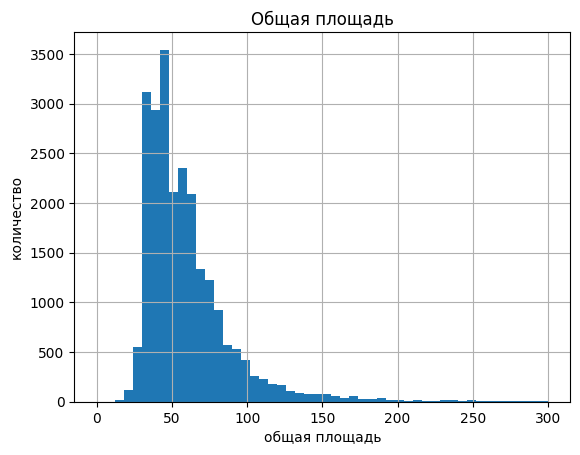

In [78]:
res_an_total_area = data['total_area'].hist(bins=50, range=(0, 300))
res_an_total_area.set_title('Общая площадь')
res_an_total_area.set_ylabel('количество')
res_an_total_area.set_xlabel('общая площадь');

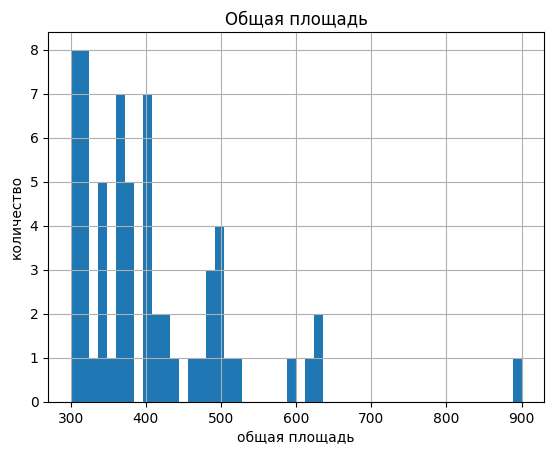

In [79]:
res_an_total_area = data['total_area'].hist(bins=50, range=(300, 900))
res_an_total_area.set_title('Общая площадь')
res_an_total_area.set_ylabel('количество')
res_an_total_area.set_xlabel('общая площадь');

Разброс значений большой от 12 квадратных метров до 900. Последнее обосновано количеством квартир свыше 10. Основная масса площадей находится в диапазоне от 30(скорее всего студии и однушки) до 65 (средняя площадь новостроек). Площадь от 65 до 120 зачастую комуналки. Площадь более 120 встречается намного реже. Площади свыше 300 и до 900 встречаются практически в единичных случаях, вероятно это уже очень старые дома, без возможности расследения.

#### Жилая площадь

In [80]:
data['living_area'].describe()

count   21,700.0
mean        34.5
std         22.0
min          2.0
25%         18.6
50%         30.0
75%         42.3
max        409.7
Name: living_area, dtype: float64

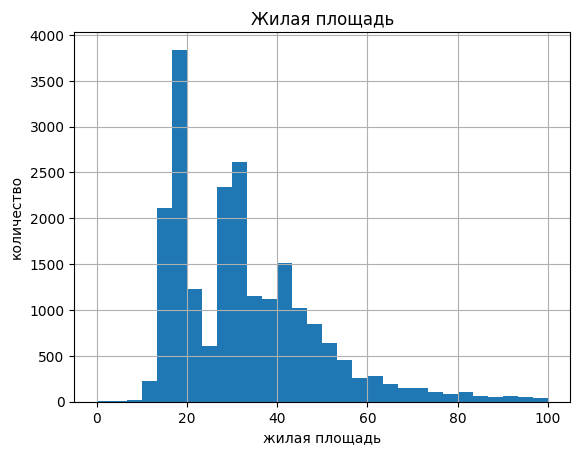

In [81]:
res_an_living_area = data['living_area'].hist(bins=30, range=(0, 100))
res_an_living_area.set_title('Жилая площадь')
res_an_living_area.set_ylabel('количество')
res_an_living_area.set_xlabel('жилая площадь');

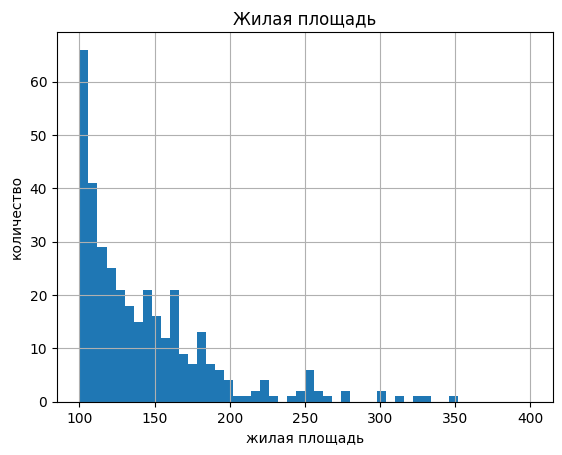

In [82]:
res_an_living_area = data['living_area'].hist(bins=50, range=(100, 400))
res_an_living_area.set_title('Жилая площадь')
res_an_living_area.set_ylabel('количество')
res_an_living_area.set_xlabel('жилая площадь');

Основная масса жилой площади приходится на 20 квадратных метров, что типично для студий и однокомнатных квартир, второй пик на 30 с чего обычно начинается типовая застройка двушек. После 60 квадратных метров количество квартир идёт на убыль, оставляя единичные случаи.

#### Площадь кухни

In [83]:
data['kitchen_area'].describe()

count   21,343.0
mean        10.6
std          5.9
min          1.3
25%          7.0
50%          9.1
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

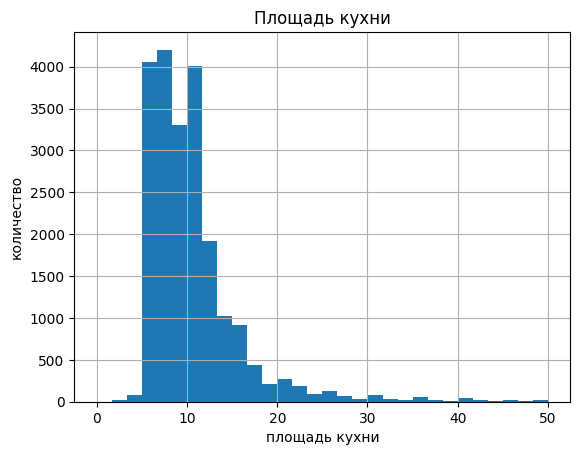

In [84]:
res_an_kitchen_area = data['kitchen_area'].hist(bins=30, range=(0, 50))
res_an_kitchen_area.set_title('Площадь кухни')
res_an_kitchen_area.set_ylabel('количество')
res_an_kitchen_area.set_xlabel('площадь кухни');

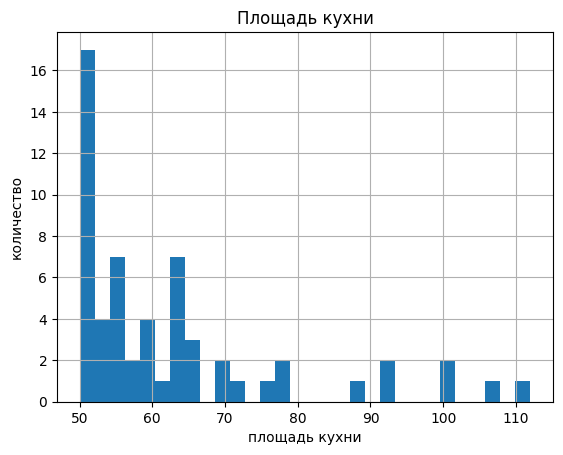

In [85]:
res_an_kitchen_area = data['kitchen_area'].hist(bins=30, range=(50, 112))
res_an_kitchen_area.set_title('Площадь кухни')
res_an_kitchen_area.set_ylabel('количество')
res_an_kitchen_area.set_xlabel('площадь кухни');

Основная масса площадей кухонь приходится на диапазон от 5 до 13 квадратных метров. Кухни большей площади встречаются намного реже.

#### Цена объекта

In [86]:
pd.options.display.float_format ='{:,.1f}'.format
data['last_price'].describe()

count        23,565.0
mean      6,540,575.0
std      10,910,913.9
min         430,000.0
25%       3,400,000.0
50%       4,647,000.0
75%       6,790,000.0
max     763,000,000.0
Name: last_price, dtype: float64

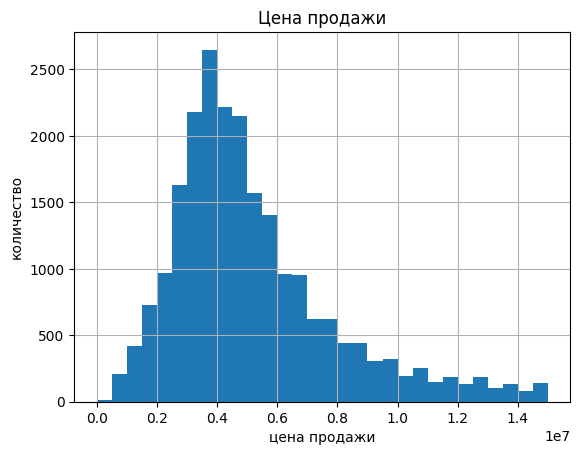

In [87]:
res_an_last_price = data['last_price'].hist(bins=30, range=(0, 15000000))
res_an_last_price.set_title('Цена продажи')
res_an_last_price.set_ylabel('количество')
res_an_last_price.set_xlabel('цена продажи');

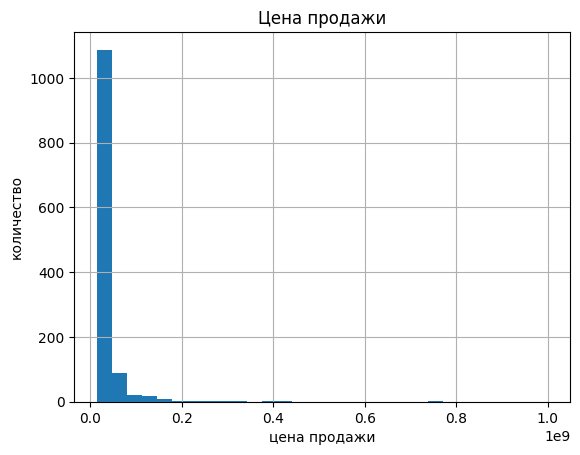

In [88]:
res_an_last_price = data['last_price'].hist(bins=30, range=(15000000, 1000000000))
res_an_last_price.set_title('Цена продажи')
res_an_last_price.set_ylabel('количество')
res_an_last_price.set_xlabel('цена продажи');

Анализируя стоимость, то основная масса квартир находится в диапазоне от 2 000 000 до 8 000 000(на то время). Квартир дороже 8 миллионов значительно меньше на рынке. Как и квартир за 763 миллиона.

#### <font color='#22a9eb'> Количество комнат </font>

In [89]:
data['rooms'].describe()

count   23,565.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

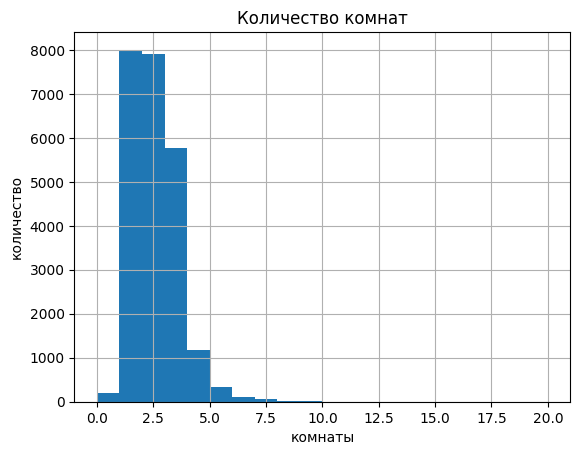

In [90]:
res_an_rooms = data['rooms'].hist(bins=20, range=(0, 20))
res_an_rooms.set_title('Количество комнат')
res_an_rooms.set_ylabel('количество')
res_an_rooms.set_xlabel('комнаты');

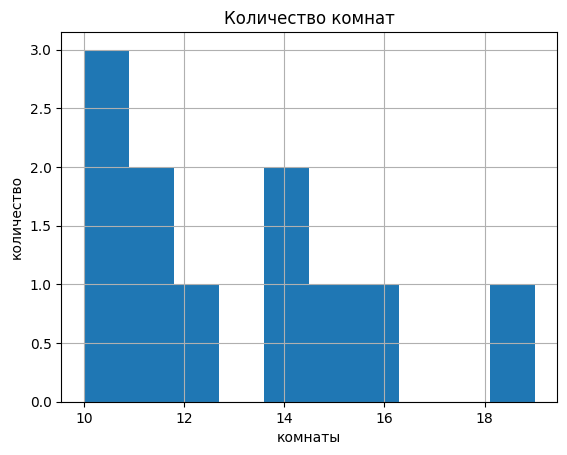

In [91]:
res_an_rooms = data['rooms'].hist(bins=10, range=(10, 19))
res_an_rooms.set_title('Количество комнат')
res_an_rooms.set_ylabel('количество')
res_an_rooms.set_xlabel('комнаты');

В некоторых случаях количество комнат равно нулю, предположительно это либо студия где всё в одном, либо свободная планировка. Преобладают квартиры с 2-мя и 3-мя комнатами, реже с 4-мя. Имеют место быть и квартиры с 10, 12, 14 комнатами.

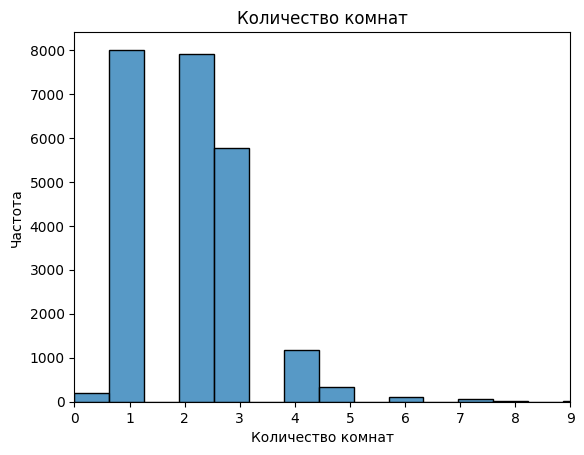

In [92]:
#Код ревьюера
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['rooms'], kde=False, bins=30)
plt.xlim(0,9)
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Спасибо, ты абсолютно прав. Причем далее же сам уменьшал лимит для наглядности, а тут пропустил.
/div>

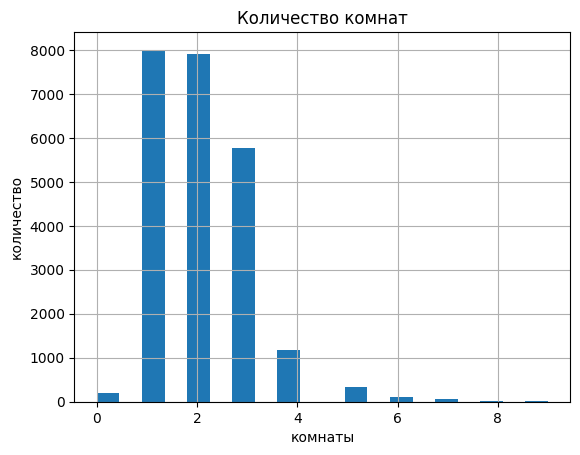

In [93]:
res_an_rooms = data['rooms'].hist(bins=20, range=(0, 9))
res_an_rooms.set_title('Количество комнат')
res_an_rooms.set_ylabel('количество')
res_an_rooms.set_xlabel('комнаты');

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
В некоторых случаях количество комнат равно нулю, предположительно это либо студия где всё в одном, либо свободная планировка. Преобладают однокомнатные и двухкомнатные квартиры, затем с 3-мя комнатами, реже с 4-мя. Имеют место быть и квартиры с 10, 12, 14 комнатами.
</div>

#### Высота потолков

In [94]:
data['ceiling_height'].describe()

count   23,565.0
mean         2.7
std          0.8
min          2.0
25%          2.6
50%          2.6
75%          2.7
max         32.0
Name: ceiling_height, dtype: float64

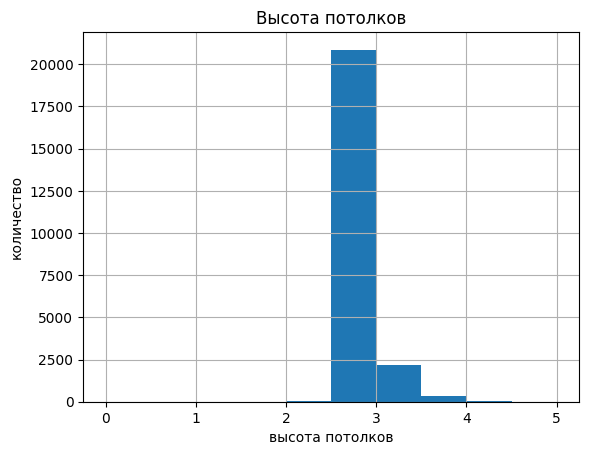

In [95]:
res_an_ceiling_height = data['ceiling_height'].hist(bins=10, range=(0, 5))
res_an_ceiling_height.set_title('Высота потолков')
res_an_ceiling_height.set_ylabel('количество')
res_an_ceiling_height.set_xlabel('высота потолков');

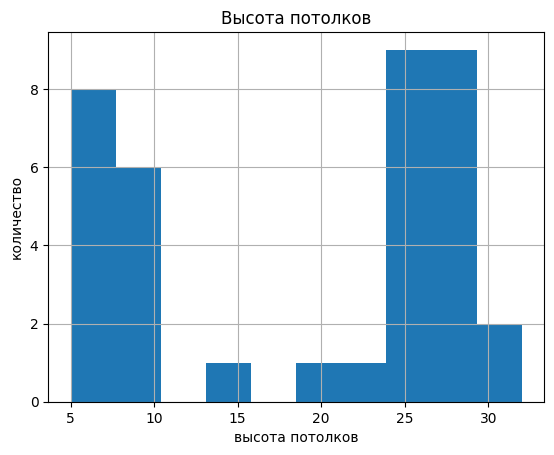

In [96]:
res_an_ceiling_height = data['ceiling_height'].hist(bins=10, range=(5, 32))
res_an_ceiling_height.set_title('Высота потолков')
res_an_ceiling_height.set_ylabel('количество')
res_an_ceiling_height.set_xlabel('высота потолков');

С огромным отрывом лидирует высота потолков от 2,5 до 2,7, можно сказать до 3. Поскольку это самое распространненое значение высоты потолков. имеют место быть высоты в 5 метров, и в некоторых как аппаратаментах, так и нет - от 25 до 28 в среднем.

#### Этаж квартиры

In [97]:
data['floor'].describe()

count   23,565.0
mean         5.9
std          4.9
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

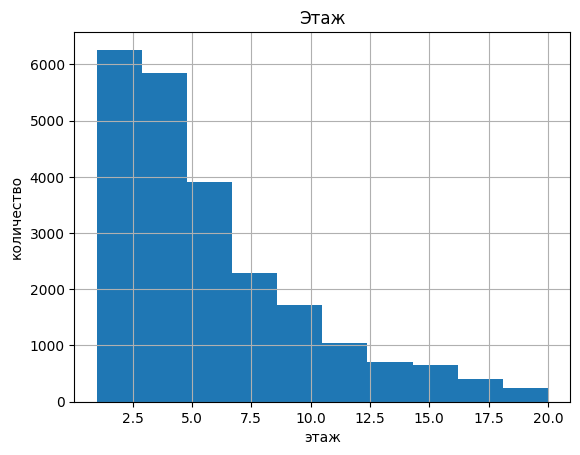

In [98]:
res_an_floor = data['floor'].hist(bins=10, range=(1, 20))
res_an_floor.set_title('Этаж')
res_an_floor.set_ylabel('количество')
res_an_floor.set_xlabel('этаж');

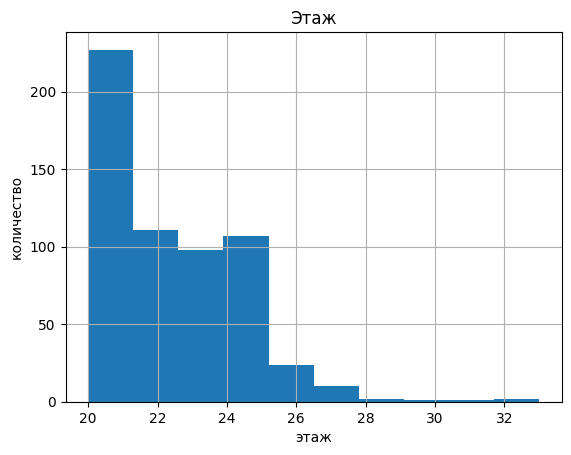

In [99]:
res_an_floor = data['floor'].hist(bins=10, range=(20, 33))
res_an_floor.set_title('Этаж')
res_an_floor.set_ylabel('количество')
res_an_floor.set_xlabel('этаж');

Много предложений до 5-го этажа включительно, затем количество предложений значительно снижается, что обусловлено пока еще внедрением в массы высокоэтажного строительства.

#### Тип этажа квартиры

In [100]:
data['type_of_flour'].value_counts()

type_of_flour
другой       17326
последний     3330
первый        2909
Name: count, dtype: int64

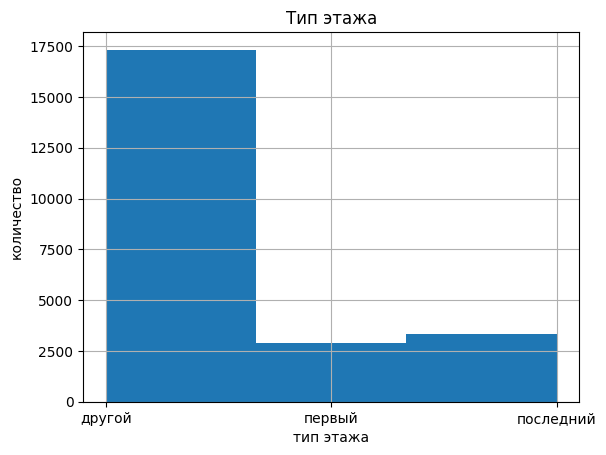

In [101]:
res_an_type_of_flour = data['type_of_flour'].hist(bins=3)
res_an_type_of_flour.set_title('Тип этажа')
res_an_type_of_flour.set_ylabel('количество')
res_an_type_of_flour.set_xlabel('тип этажа');

Количество предложений для первого и последнего этажей примерно одинаковое. Потому что это не самые приятные квартиры со своими минусами, да и даже если взять пятиэтажный дом, то на два предложения первого и последнего этажей приходится три предложения между(условно).

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Да, чаще всего продают не последний и не первый этажи - такие этажи могут быть проблемными (заглядывают прохожие, холодно, жарко, протекает крыша и т.д.)
    
Также это связано с этажностью строительства. Первый и последний этажи - это лишь по одному этажу, а группа "другой" включает в себя все этажи, кроме первого и последнего. Для 3-этажных домов мы бы увидели равномерное распределение, но строительство заметно выше, чем 3 этажа.
</div>

#### Общее количество этажей в доме

In [102]:
data['floors_total'].describe()

count   23,565.0
mean        10.7
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

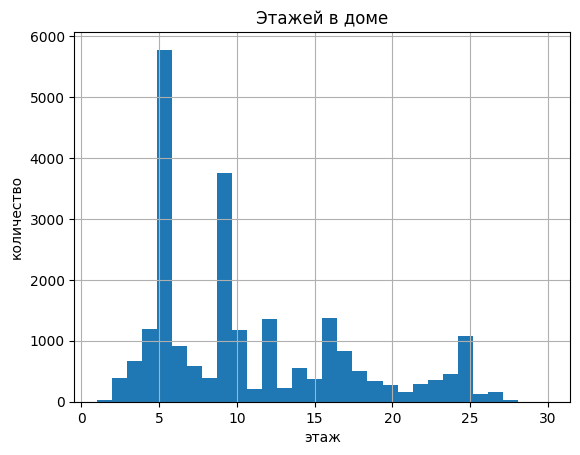

In [103]:
res_an_floors_total = data['floors_total'].hist(bins=30, range=(1, 30))
res_an_floors_total.set_title('Этажей в доме')
res_an_floors_total.set_ylabel('количество')
res_an_floors_total.set_xlabel('этаж');

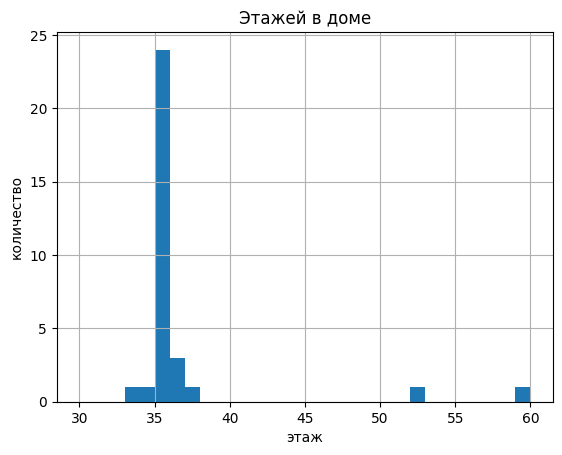

In [104]:
res_an_floors_total = data['floors_total'].hist(bins=30, range=(30, 60))
res_an_floors_total.set_title('Этажей в доме')
res_an_floors_total.set_ylabel('количество')
res_an_floors_total.set_xlabel('этаж');

Преимущественно строились дома 5-ти и 9-ти этажей, предложений квартир в таких домах самое большое количество. Среди высоток выделяются 36-ные дома.

#### Расстояние до центра города в метрах

In [105]:
data['city_centers_nearest'].describe()

count   23,565.0
mean    13,937.1
std      7,555.4
min        181.0
25%     10,935.0
50%     13,098.0
75%     15,237.0
max     65,968.0
Name: city_centers_nearest, dtype: float64

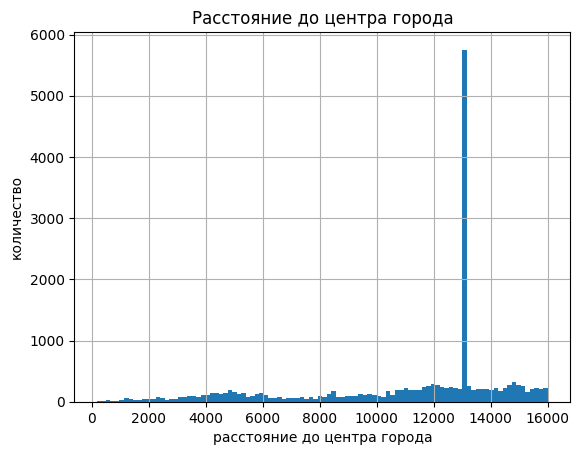

In [106]:
res_an_city_centers_nearest = data['city_centers_nearest'].hist(bins=100, range=(181, 16000))
res_an_city_centers_nearest.set_title('Расстояние до центра города')
res_an_city_centers_nearest.set_ylabel('количество')
res_an_city_centers_nearest.set_xlabel('расстояние до центра города');

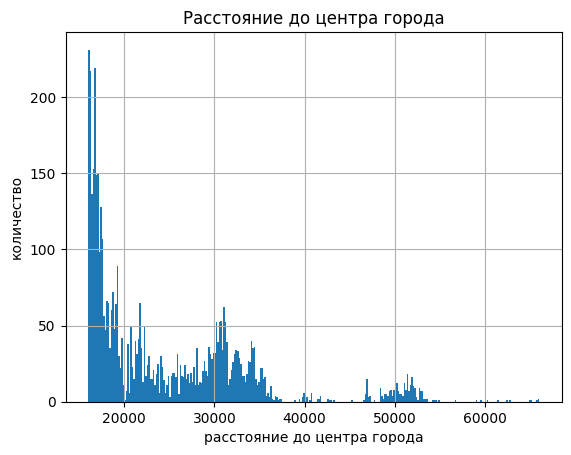

In [107]:
res_an_city_centers_nearest = data['city_centers_nearest'].hist(bins=300, range=(16000, 66000))
res_an_city_centers_nearest.set_title('Расстояние до центра города')
res_an_city_centers_nearest.set_ylabel('количество')
res_an_city_centers_nearest.set_xlabel('расстояние до центра города');

Поскольку пропущенные значения заполнялись медианным значением, то на графике заметен "шум". Однако это не мешает сделать вывод о наиболее распространенных значениях близости центра города, это от 4 до 5,5 км, от 12 до 18 км, и от 28 до 35 км примерно. Вероятно, в этих расстояниях есть какой-то смысл для местных жителей, либо эти районы в основном застраивались жилым фондом, а не промышленным или бизнес фондами.

#### Расстояние до ближайшего аэропорта

In [108]:
data['airports_nearest'].describe()

count   18,041.0
mean    28,797.1
std     12,632.5
min          0.0
25%     18,565.0
50%     26,757.0
75%     37,273.0
max     84,869.0
Name: airports_nearest, dtype: float64

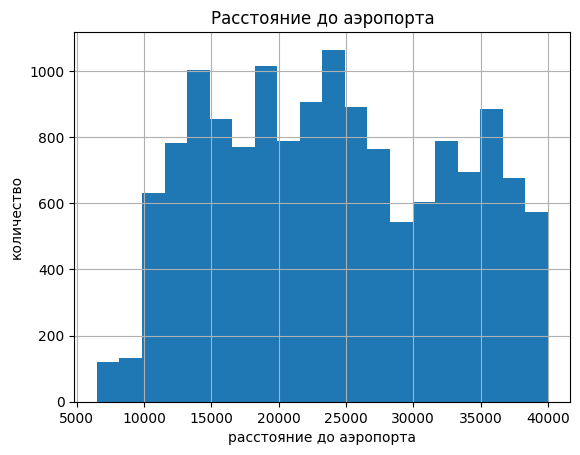

In [109]:
res_an_airports_nearest = data['airports_nearest'].hist(bins=20, range=(6500, 40000))
res_an_airports_nearest.set_title('Расстояние до аэропорта')
res_an_airports_nearest.set_ylabel('количество')
res_an_airports_nearest.set_xlabel('расстояние до аэропорта');

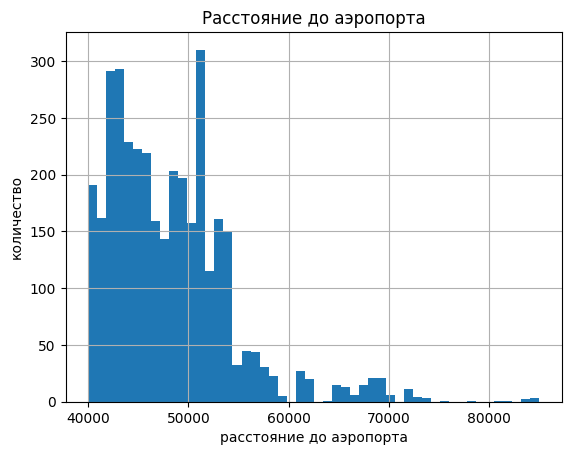

In [110]:
res_an_airports_nearest = data['airports_nearest'].hist(bins=50, range=(40000, 85000))
res_an_airports_nearest.set_title('Расстояние до аэропорта')
res_an_airports_nearest.set_ylabel('количество')
res_an_airports_nearest.set_xlabel('расстояние до аэропорта');

Для этого столбца пропущенные значения так же были заполнены медианным значением. Аэропорты строятся на примерно одинаковом отделении от города, чтобы шум не мешал жителям и на случай чрезвычайных ситуаций было какое-то расстояние. В целом количество предложений на расстоянии от 10 км до 30 км примерно одинаковое. Предложений до 10 км значительно меньше. Свыше 40 км, что скорее всего говорит о деревнях или отдаленных районах, но меньше 53 км в среднем ровное.

#### Расстояние до ближайшего парка

In [111]:
data['parks_nearest'].describe()

count   8,030.0
mean      490.6
std       341.6
min         1.0
25%       288.0
50%       455.0
75%       612.0
max     3,190.0
Name: parks_nearest, dtype: float64

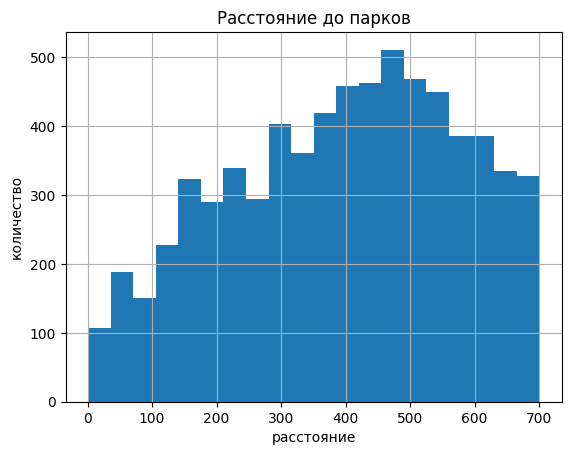

In [112]:
res_an_parks_nearest = data['parks_nearest'].hist(bins=20, range=(1, 700))
res_an_parks_nearest.set_title('Расстояние до парков')
res_an_parks_nearest.set_ylabel('количество')
res_an_parks_nearest.set_xlabel('расстояние');

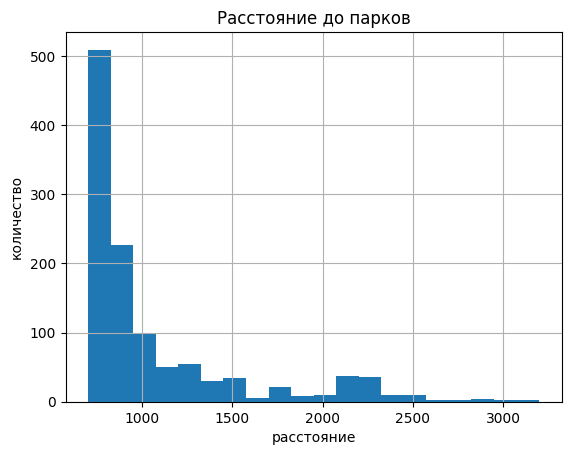

In [113]:
res_an_parks_nearest = data['parks_nearest'].hist(bins=20, range=(700, 3200))
res_an_parks_nearest.set_title('Расстояние до парков')
res_an_parks_nearest.set_ylabel('количество')
res_an_parks_nearest.set_xlabel('расстояние');

Основное количество предложений находится на расстоянии от 350 до 550 метров от парков. Это довольно интересная цифра и говорит о доступной возможности отдохнуть на свежем воздухе.

#### День и месяц публикации объявления

In [114]:
display(data['day_publucation'].describe())
display(data['month_publucation'].describe())

count   23,565.0
mean         2.6
std          1.8
min          0.0
25%          1.0
50%          3.0
75%          4.0
max          6.0
Name: day_publucation, dtype: float64

count   23,565.0
mean         6.4
std          3.5
min          1.0
25%          3.0
50%          6.0
75%         10.0
max         12.0
Name: month_publucation, dtype: float64

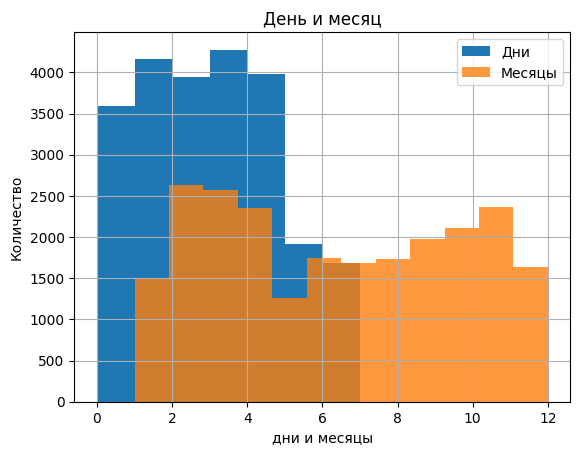

In [115]:
(
    data['day_publucation']
    .hist(bins=7, range=(0, 7), legend=True)
    .set_title('День и месяц')
)
graf = (
    data['month_publucation']
    .hist(bins=12, range=(1, 12), alpha = 0.8, legend=True)
    
)
graf.set_ylabel('Количество')
graf.set_xlabel('дни и месяцы')
graf.legend(['Дни', 'Месяцы'])

На основании графика можно сделать вывод, что предложения в основном выкладываются в рабочие дни, больше всего во вторник и четверг, меньше в среду и пятницу, еще меньше в понедельник, и в среднем в двара раза реже по выходным. При анализе месяцев создания объявлений, то пик с февраля по май. затем предложений становится значительно меньше на месяц, и с июня кличество предложений постепенно растет до ноября и падает в декабре.

#### Скорость продажи квартиры

In [116]:
data['days_exposition'].describe()

count   20,394.0
mean       180.7
std        219.7
min          1.0
25%         45.0
50%         95.0
75%        231.0
max      1,580.0
Name: days_exposition, dtype: float64

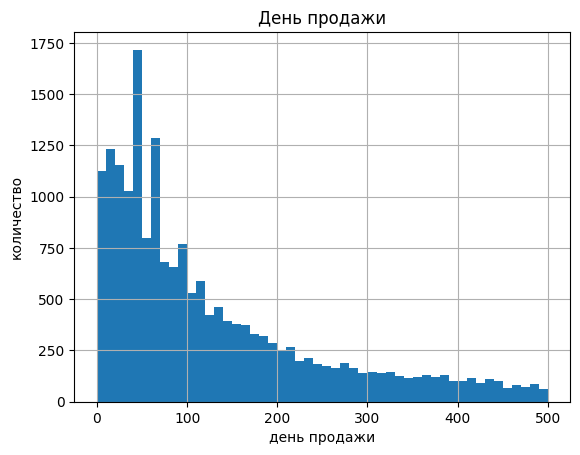

In [117]:
res_an_days_exposition = data['days_exposition'].hist(bins=50, range=(0, 500))
res_an_days_exposition.set_title('День продажи')
res_an_days_exposition.set_ylabel('количество')
res_an_days_exposition.set_xlabel('день продажи');

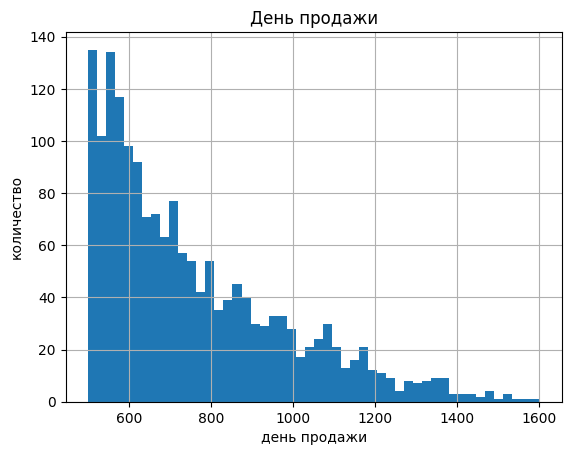

In [118]:
res_an_days_exposition = data['days_exposition'].hist(bins=50, range=(500, 1600))
res_an_days_exposition.set_title('День продажи')
res_an_days_exposition.set_ylabel('количество')
res_an_days_exposition.set_xlabel('день продажи');

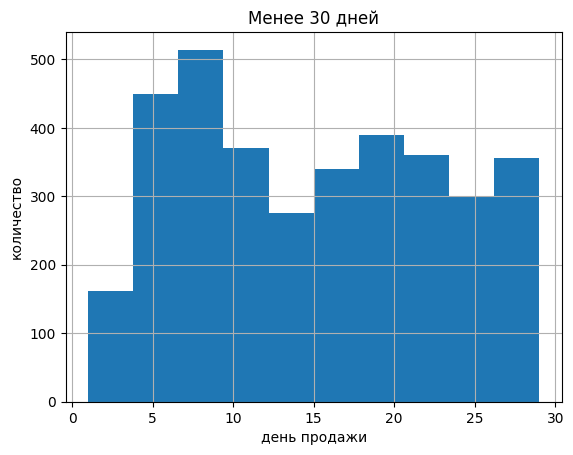

In [119]:
res_an_days_exposition = data[data['days_exposition'] < 30]['days_exposition'].hist()
res_an_days_exposition.set_title('Менее 30 дней')
res_an_days_exposition.set_ylabel('количество')
res_an_days_exposition.set_xlabel('день продажи');

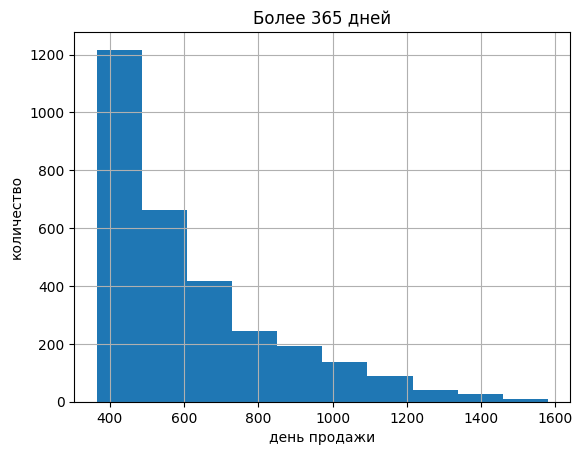

In [120]:
res_an_days_exposition = data[data['days_exposition'] > 365]['days_exposition'].hist()
res_an_days_exposition.set_title('Более 365 дней')
res_an_days_exposition.set_ylabel('количество')
res_an_days_exposition.set_xlabel('день продажи');

Стандартная срок продажи квартиры состаляет около 3-х месяцев, то есть 90 дней. По гистограммам это тенденция прослеживается. Свыше ста дней квартиры уже продаются реже и далее по низхоящей. Если ориентироваться на то, какие продажи можно отнести к быстрым, то это продажи до 1-го месяца. К необычно долгим продажам можно отнести недвижимость со сроком продажи более года. В данных так же можно заметить и срочные продажи, обычно они занимают от 3-х до 14-ти дней.

#### <font color='#22a9eb'> Факторы, влияющие на общую (полную) стоимость объекта </font>

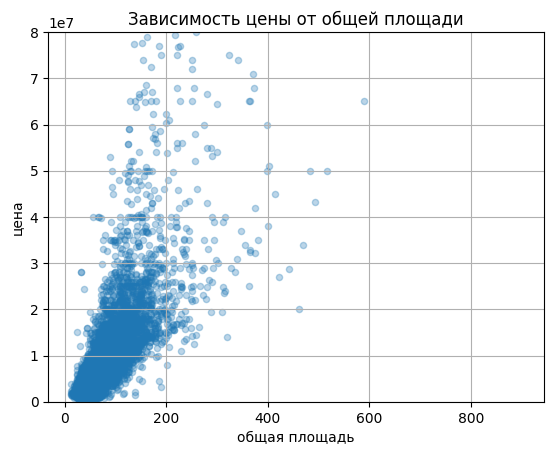

In [121]:
factor = data.sort_values('total_area').plot(
    x='total_area',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 80000000)
)
factor.set_title('Зависимость цены от общей площади')
factor.set_ylabel('цена')
factor.set_xlabel('общая площадь');

In [122]:
corr_total_area = data['last_price'].corr(data['total_area'])
corr_total_area

0.6536873006579854

На графике анализа общей площади от цены наблюдается ожидаемый рост стоимости жилья с ростом общей площади, который в среднем останавливается на значении площади в 190 квадратных метров, а далее остается на некотором ценовом диапазоне, что может быть объяснено отсутствие спроса на такое жилье. При этом есть отдельные случаи, когда квартира с не самой большой площадью стоит значительно дороже остальных, а квартира с самой большой площадью стоит не дороже всех.
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Коэфициент корреляции 0,65 говорит о некотрой связи цены и общей площади, но не слишком сильной.
</div>

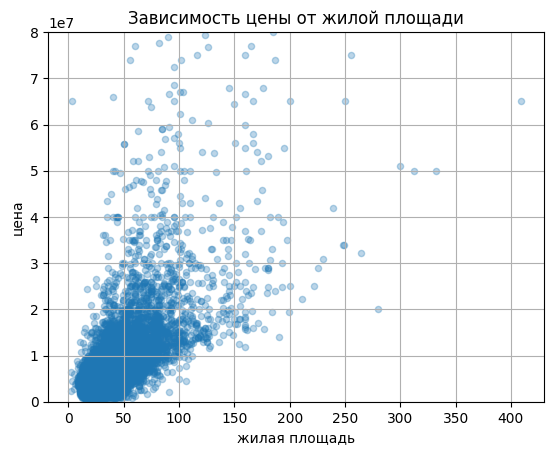

In [123]:
factor = data.sort_values('living_area').plot(
    x='living_area',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 80000000)
)
factor.set_title('Зависимость цены от жилой площади')
factor.set_ylabel('цена')
factor.set_xlabel('жилая площадь');

In [124]:
corr_living_area = data['last_price'].corr(data['living_area'])
corr_living_area

0.5663748815583991

На графике жилой площади при достижении показателя в 50 квадратных метров наблюдается тенденция на примерно одинаковую стоимость жилья в среднем, остается на примерно одном значении до 100 квадратных метров и затем несколько снижается.
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Коэфициент корреляции 0,57 говорит о слабой связи цены и жилой площади.
</div>

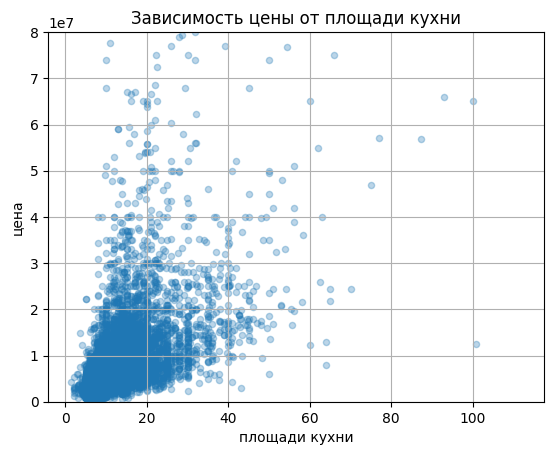

In [125]:
factor = data.sort_values('kitchen_area').plot(
    x='kitchen_area',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 80000000)
)
factor.set_title('Зависимость цены от площади кухни')
factor.set_ylabel('цена')
factor.set_xlabel('площади кухни');

In [126]:
corr_kitchen_area = data['last_price'].corr(data['kitchen_area'])
corr_kitchen_area

0.5206604901471147

На графике стоимости жилья в зависимости от кухонных метров наблюдается рост до 20 квадратов, затем небольшое снижение цены при 25 квадратах и примерно постоянная стоимость до 40 квадратов. Большая кухня это хорошо, но не слишком.
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Коэфициент корреляции 0,52 говорит о слабой связи цены и площади кухни. Причем эта связь слабее предыдущих двух.
</div>

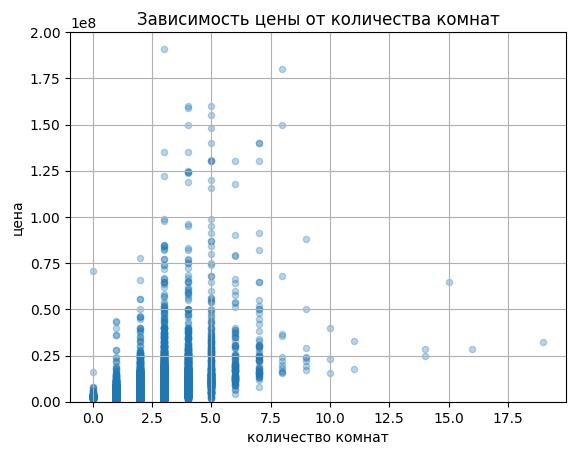

In [127]:
factor = data.sort_values('rooms').plot(
    x='rooms',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 200000000)
)
factor.set_title('Зависимость цены от количества комнат')
factor.set_ylabel('цена')
factor.set_xlabel('количество комнат');

In [128]:
corr_rooms = data['last_price'].corr(data['rooms'])
corr_rooms

0.3631881382327345

На графике зависимости стоимости жилья от количества комнат видна четкая динамика роста до 3-х контаных квартир. От 3-х до 5-ти комнат цена примерно одинаковая. Свыше пяти комнат цена падает. 
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Коэфициент корреляции 0,36 говорит о слабой связи цены и количестве комнат. Причем эта связь еще слабее предыдущих. Сколько хотите комнат 5? 10? Та не особо это влияет на цену.
</div>

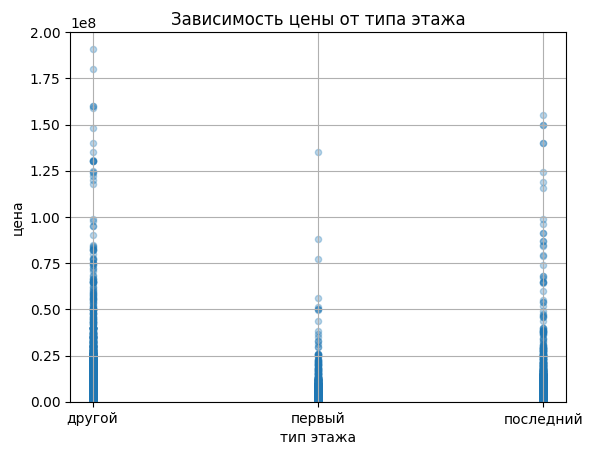

In [129]:
factor = data.sort_values('type_of_flour').plot(
    x='type_of_flour',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 200000000)
)
factor.set_title('Зависимость цены от типа этажа')
factor.set_ylabel('цена')
factor.set_xlabel('тип этажа');

In [130]:
display(data['type_of_flour'].value_counts())
data.pivot_table(index='type_of_flour', values='last_price', aggfunc='median')

type_of_flour
другой       17326
последний     3330
первый        2909
Name: count, dtype: int64

,last_price
type_of_flour,
другой,"4,848,500.0"
первый,"3,900,000.0"
последний,"4,300,000.0"


На графике можно увидеть, что стоимость квартир на первом этаже ниже всех, на последнем выше. В этом случае можно сделать вывод, что стоимость квартиры на первом и последнем этаже ниже остальных вариантов и такие квартиры обойдутся дешевле.

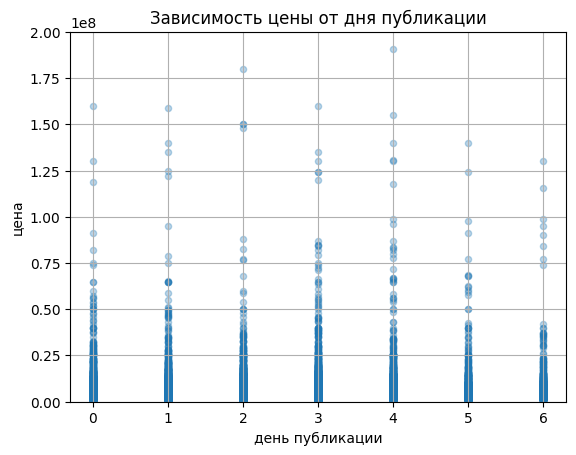

In [131]:
factor = data.sort_values('day_publucation').plot(
    x='day_publucation',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 200000000)
)
factor.set_title('Зависимость цены от дня публикации')
factor.set_ylabel('цена')
factor.set_xlabel('день публикации');

In [132]:
corr_day_publucation = data['last_price'].corr(data['day_publucation'])
corr_day_publucation

0.0013418961653882432

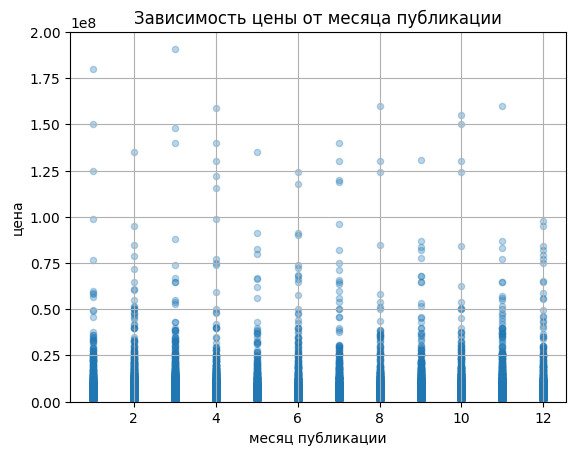

In [133]:
factor = data.plot(
    x='month_publucation',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 200000000)
)
factor.set_title('Зависимость цены от месяца публикации')
factor.set_ylabel('цена')
factor.set_xlabel('месяц публикации');

In [134]:
corr_month_publucation = data['last_price'].corr(data['month_publucation'])
corr_month_publucation

0.002679836301062002

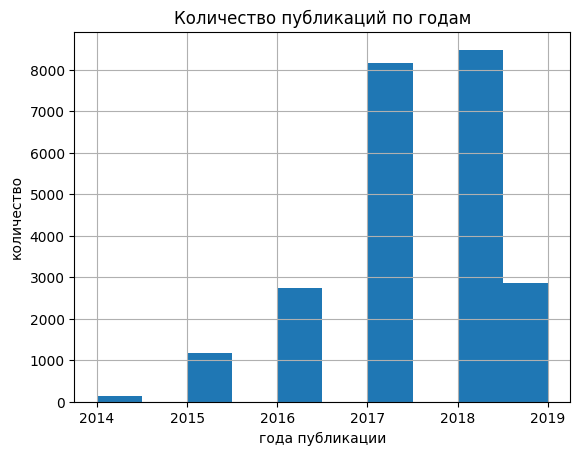

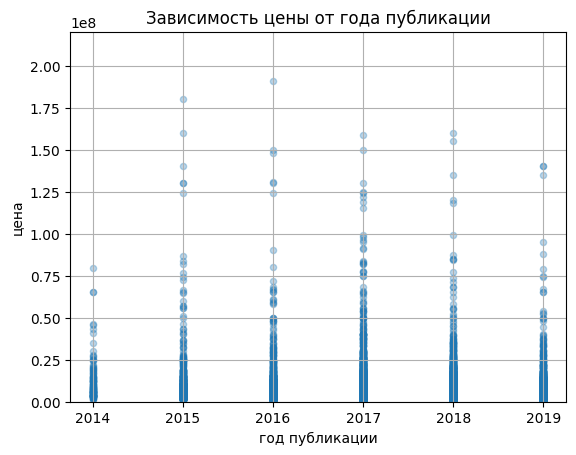

In [135]:
years_publicate = data['year_publucation'].hist()
years_publicate.set_title('Количество публикаций по годам')
years_publicate.set_ylabel('количество')
years_publicate.set_xlabel('года публикации');

factor = data.plot(
    x='year_publucation',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 220000000)
)
factor.set_title('Зависимость цены от года публикации')
factor.set_ylabel('цена')
factor.set_xlabel('год публикации');

In [136]:
corr_year_publucation = data['last_price'].corr(data['year_publucation'])
corr_year_publucation

-0.04278985850104462

На графике зависмости дня недели, месяца и года можно увидеть следующее:
- квартиры по наибольшей цене продаются со вторника по пятницу(основные дни для продаж), близко к ним в понедельник, и самые дешевые варианты в выходные;
- по месяцам лучше всего брать в мае, самые дорогие варианты уходят в январе и декабре, в остальном февраль-апрель несколько дороже сотавшихся периодов года;
- по годам стоимость жилья в цене увеличивается, но на графике заметен резкий спад в 2019 году;
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Коэфициент корреляции (день - 0,001, месяц - 0,003, год - -0,04) говорят об отсутствии связи цены и периода.
</div>

In [137]:
data['year_publucation'].value_counts()

year_publucation
2018    8486
2017    8161
2019    2871
2016    2745
2015    1166
2014     136
Name: count, dtype: int64

Резкий спад в 2019 году обоснован меньшим количеством информации по этому году.

In [138]:
corr_frame = pd.DataFrame({'corr_coefs': [
    corr_total_area,
    corr_living_area,
    corr_kitchen_area,
    corr_rooms,
    corr_day_publucation,
    corr_month_publucation,
    corr_year_publucation
]}
    )
corr_frame.index = [
    'Корреляция общей площади',
    'Корреляция жилой площади',
    'Корреляция площади кухни',
    'Корреляция количества комнат',
    'Корреляция дня публикации',
    'Корреляция месяца публикации',
    'Корреляция года публикации'
]
corr_frame

,corr_coefs
Корреляция общей площади,0.7
Корреляция жилой площади,0.6
Корреляция площади кухни,0.5
Корреляция количества комнат,0.4
Корреляция дня публикации,0.0
Корреляция месяца публикации,0.0
Корреляция года публикации,-0.0


<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
К сожалению корреляции по основным параметрам квартир не рассчитаны. Их очень не хватает для оценки линейной взаимосвязи в данных.
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Точно! Коэффициент корреляции, вот про что я забыл. Вижу, что чего-то не хватает, но никак не пойму чего. Поправлено.  

Благодаря рассчитанным коэффициентам корреляции можно проследить наиболее сильную зависимость цены от общей площадт, меньшуюю от жилой площади, еще меньшую от площади кухни, а остальные критерии не особо влияют.
</div>

#### Средняя цена одного квадратного метра в 10 населённых пунктах

In [139]:
ten_locality_name = (
    data.groupby('locality_name')['rooms']
    .count()
    .sort_values(ascending=False)
    .head(10)
)
ten_locality_name

locality_name
Санкт-Петербург      15651
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: rooms, dtype: int64

<Axes: xlabel='locality_name'>

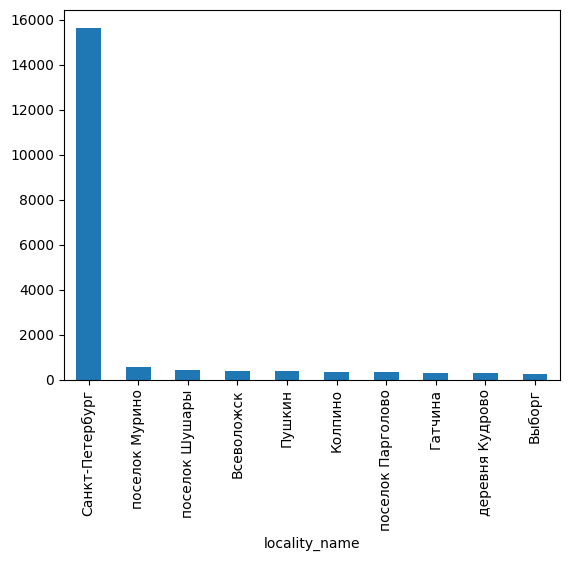

In [140]:
ten_locality_name.plot(x=ten_locality_name.index, y=ten_locality_name, kind='bar')

<Axes: xlabel='locality_name'>

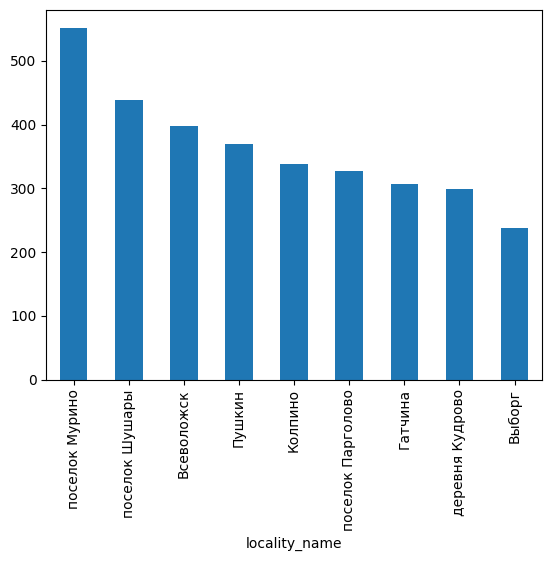

In [141]:
not_piter = ten_locality_name[ten_locality_name.index != 'Санкт-Петербург']
not_piter.plot(x=ten_locality_name.index, y=ten_locality_name, kind='bar')

In [142]:
data_for_ten = data[data['locality_name'].isin(ten_locality_name.index)]
mean_prc_per_sqr_ten = round(data_for_ten['price_per_square'].mean(), 2)
median_prc_per_sqr_ten = round(data_for_ten['price_per_square'].median(), 2)
print('Средняя цена квадратного метра среди 10 населенных пунктов:', mean_prc_per_sqr_ten)
print('Медианная цена квадратного метра среди 10 населенных пунктов:', median_prc_per_sqr_ten)

Средняя цена квадратного метра среди 10 населенных пунктов: 109032.14
Медианная цена квадратного метра среди 10 населенных пунктов: 100435.0


In [143]:
min_prc_sqr_ten = data_for_ten[
    data_for_ten['price_per_square'] == data_for_ten['price_per_square']
    .min()]['locality_name'].iloc[0]
max_prc_sqr_ten = data_for_ten[
    data_for_ten['price_per_square'] == data_for_ten['price_per_square']
    .max()]['locality_name'].iloc[0]
print('Самая никая цена за квадратный метр среди 10 населенных пунктов:', min_prc_sqr_ten)
print('Самая высокая цена за квадратный метр среди 10 населенных пунктов:', max_prc_sqr_ten)

Самая никая цена за квадратный метр среди 10 населенных пунктов: Гатчина
Самая высокая цена за квадратный метр среди 10 населенных пунктов: Санкт-Петербург


In [144]:
data_for_ten.sort_values('price_per_square')['locality_name'].head(10)

23477            Гатчина
9471             Гатчина
17753    Санкт-Петербург
19952    Санкт-Петербург
21338    Санкт-Петербург
23394    Санкт-Петербург
13060            Гатчина
12536             Выборг
17298             Выборг
5837              Выборг
Name: locality_name, dtype: object

In [145]:
data_for_ten.sort_values('price_per_square')['locality_name'].tail(10)

17912    Санкт-Петербург
16647    Санкт-Петербург
4859     Санкт-Петербург
17172    Санкт-Петербург
16461    Санкт-Петербург
4996     Санкт-Петербург
14706    Санкт-Петербург
22831    Санкт-Петербург
1436     Санкт-Петербург
12971    Санкт-Петербург
Name: locality_name, dtype: object

По представленным данным самое большое количество объявлений в Санкт-Петербурге. Средняя и медианная цена одного квадратного метра среди населенных пунктов с наибольшем количеством объявлений составляет порядка ста тысяч. Минимальная цена за квадратный метр в Гатчине, максимальная ожидаемо в Санкт-Петербурге. Среди десяти населенных пунктов с самой дешевой стоимостью квадратного метра находится Гатчина, Санкт-Петербург и Выборг.

#### Стоимость объектов от расстояния до центра города

/tmp/ipykernel_61267/3066113698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_saint_piter['mean_price_of_center'] = in_saint_piter['last_price'] / in_saint_piter['city_centers_nearest_km']


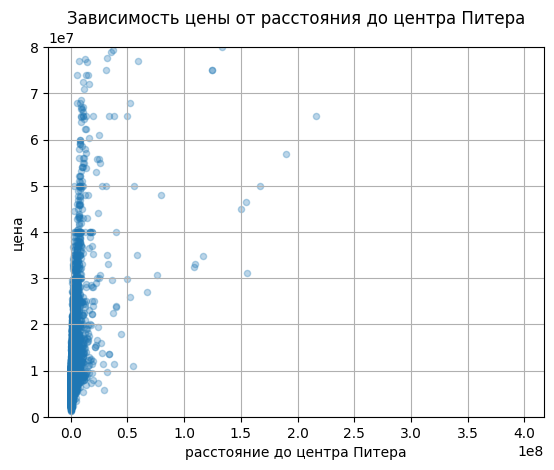

In [146]:
in_saint_piter = data[data['locality_name'] == 'Санкт-Петербург']
in_saint_piter['mean_price_of_center'] = in_saint_piter['last_price'] / in_saint_piter['city_centers_nearest_km']
hist_in_saint_piter = in_saint_piter.sort_values('mean_price_of_center').plot(
    x='mean_price_of_center',
    y='last_price',
    kind='scatter',
    alpha=0.3,
    grid=True,
    ylim=(0, 80000000)
)
hist_in_saint_piter.set_title('Зависимость цены от расстояния до центра Питера')
hist_in_saint_piter.set_ylabel('цена')
hist_in_saint_piter.set_xlabel('расстояние до центра Питера');
# Я осознанно делаю доп.столбец в отдельном срезе основных данных,
# потому что более он нигде не используется и не нужен.

Согласно графику, чем ближе квартиры к центру города, тем дороже они в целом стоят. Встречаются и исключения, которые так же зависят от ряда дополнительных факторов.

### Общий вывод

После проведенной работы можно сделать несколько выводов.
1. Отсутствие некоторых данных может создать проблемы при анализе. Не всегда есть возможность заполнить данные средним или медианным значением и не испортить их. С другой стороны артефакты или отсутсвие каких-то данных могут возникать по огромному количеству причин и добиться идельно подготовленных данных для анализы очень сложно;
2. При заполнении пропусков важно рассмотреть влияние этого на смежные данные, не изменилась ли достоверность этих данных, как изменилась зависимость от остальных параметров;
3. После проведенного анализа можно сделать вывод, что стоимость квартиры зависит от ряда факторов, которые в свою очередь так же зависят от ряда других параметров. Например, наблюдается тенденция роста цены квартиры в зависимости от количества комнат до 3 комнат. После чего стоимость остается примерно на одном уровне до 5 комнат, а затем падает. Дело вовсе не в том, что выгоднее купить квартиру с 10 комнатами, чем двушку, а при большом количестве комнат в продажу выставляется не целая квартира, а отделньые комнаты, которые приближаются к цене однушки. Так же на стоимость квартиры влияет ряд факторов по части близости центра города и парков. Чем более облагороженная территория с большим количеством транспорта(для центра), тем выше стоимость квартиры. Примерно такой же эффект и возникает при увеличении площади. Квартира в центре на 15 квадратных метров, может стоить дороже квартиры(или дома) на удалении в 60 км с площадью в 50 квадратных метров. Если отойти от параметров оказывающих непосредственное влияние на цену квартиры, то можно еще так же рассмотреть сезонность и дату выставления объявления. В какие дни преимущественно покупаются квартиры, в каком месяце и какая тенденция наблюдается  с каждым годом по росту цен, количеству продаж и так далее. 

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Ты очень серьезно подходишь к визуализации.

Вот пара ссылок на полезные источники:https://habr.com/ru/company/otus/blog/540526/, https://pythonru.com/biblioteki/seaborn-plot
</div>

<div class="alert alert-success">   
    
#### Книги
* Уэс Маккинни «Python и анализ данных. 3-е издание»

#### Материалы
* [Kaggle | исследовательский анализ данных — Jupyter-тетрадка](https://www.kaggle.com/code/emstrakhov/eda-with-pandas/notebook)
* [Блог Дмитрия Макарова | практика EDA, датасет «Титаник»](https://www.dmitrymakarov.ru/data-analysis/eda-04/)
* [Colaboratory | Jupyter-тетрадка по сводным таблицам (pivot tables)](https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/быстрое%20введение%20в%20pandas/Сводная%20таблица%20в%20pandas.ipynb)
</div>